# Exective summary of Work Package 1

## Objectives

This work package aims at developing methods for cleaning and preprocessing the data, and select the most relevant features for further model development.

## Tasks

- Task 1: Read and understand the data
  - Understand how to use the provided utility function to read the data
  - Understand the data structure and the meaning of each column
- Task 2: Clean and preprocess the data
  - Explore the quality of the data
  - Develop methods to remove the outlier and clean the data
- Task 3: Feature engineering
  - Visualize the data
  - Develop methods to select the most relevant features

## Delierables

- A Jupyter notebook reporting the process and results of the above tasks

## Submission

- Please name your notebook as `Group_X_WP_1.ipynb` and submit it via: https://nextcloud.centralesupelec.fr/s/TctBDacL9ZxBkrj
- Deadline: 27/04/2025 23:59


# Task 1 Read and understand the data

## Sub-task 1: Read the data from the different csv files and store it in a dataframe. 

The training data is stored in the following path: `projects\maintenance_industry_4_2024\dataset\training_data`. In this folder, there are some subfolders. Each subfolder contains the data of one test. The name of the subfolder tells you the time when the test is performed. Inside each subfolder, there are six csv files, each file corresponds to the data from one motor. The file `Test condition.xlsx` tells you the test condition for each test.

In `utility.py`, there are supporting functions `read_all_csvs_one_test` and `read_all_test_data_from_path`. Please have a look at the demo in `demo_read_data_and_preprocess.ipynb`, and use these supporting functions to read the data.


**Your task:**

- Create a dataframe to store data from all the test.
- Write a paragraph to explain the structure of the resulted dataframe (what does each column represent?)

20240105_164214: 0    Not moving
Name: Description, dtype: object



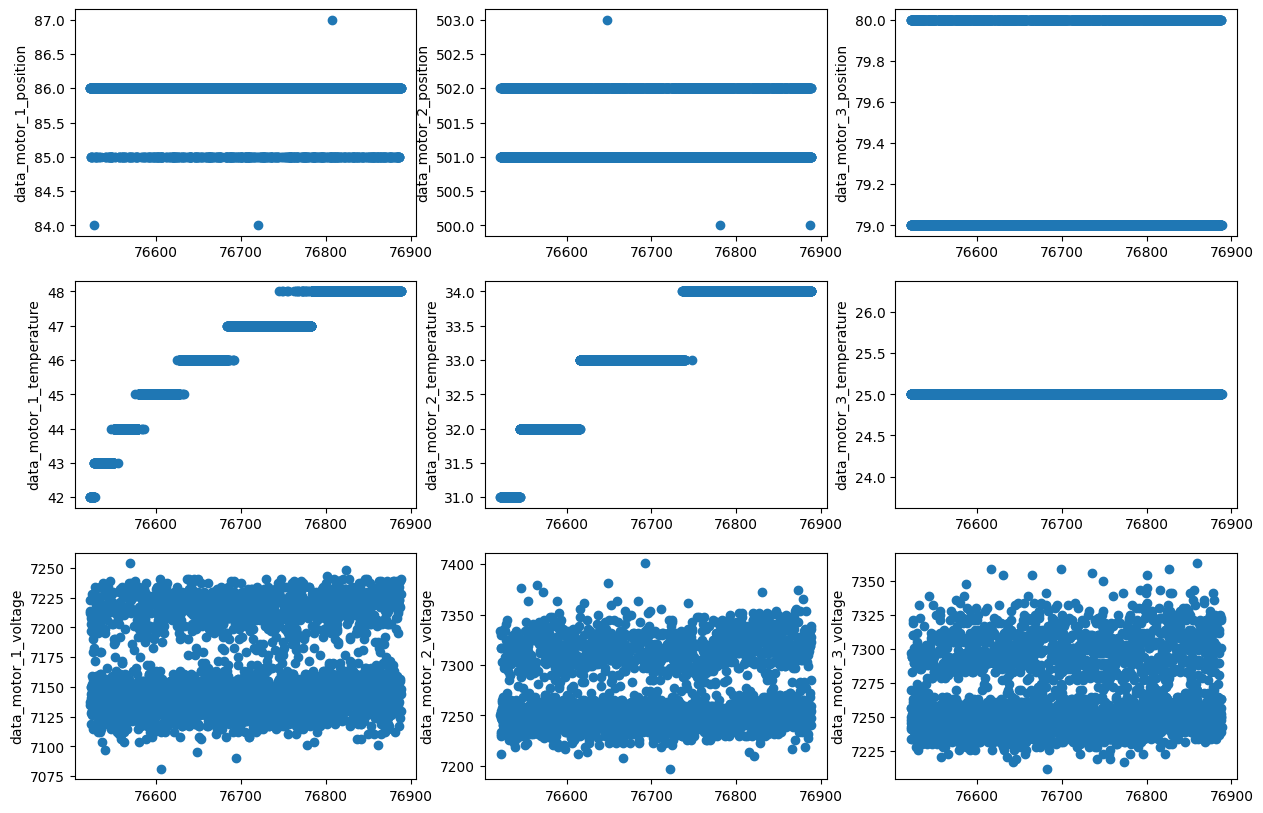

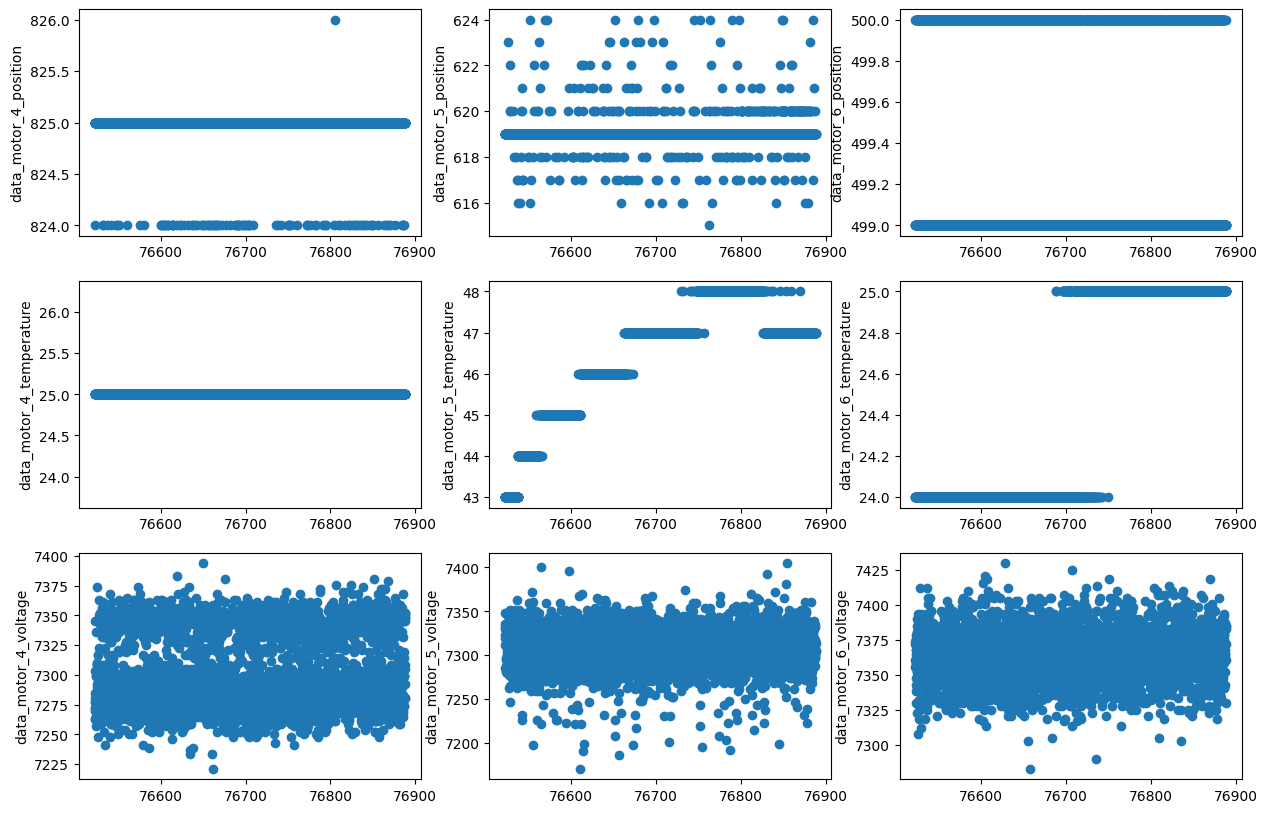

20240105_165300: 1    Pick up and place
Name: Description, dtype: object



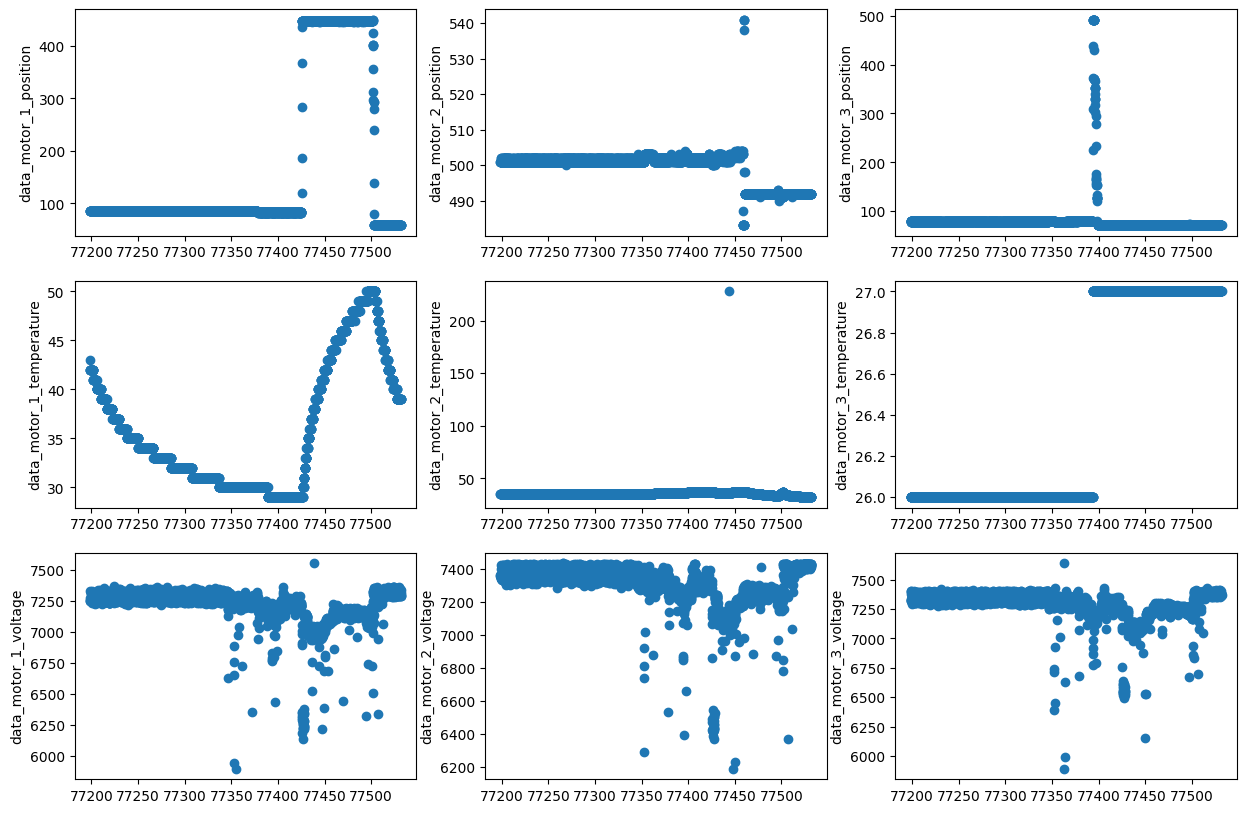

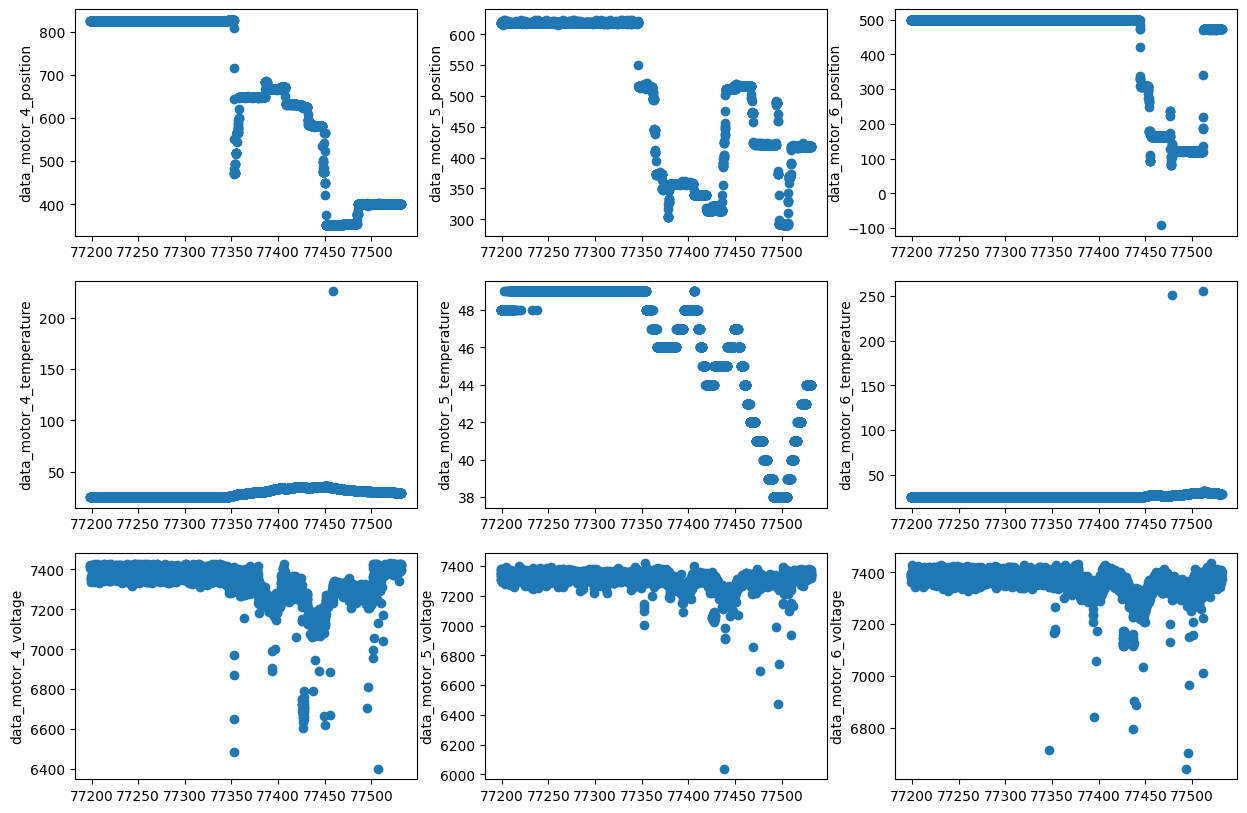

20240105_165972: 2    Not moving
Name: Description, dtype: object



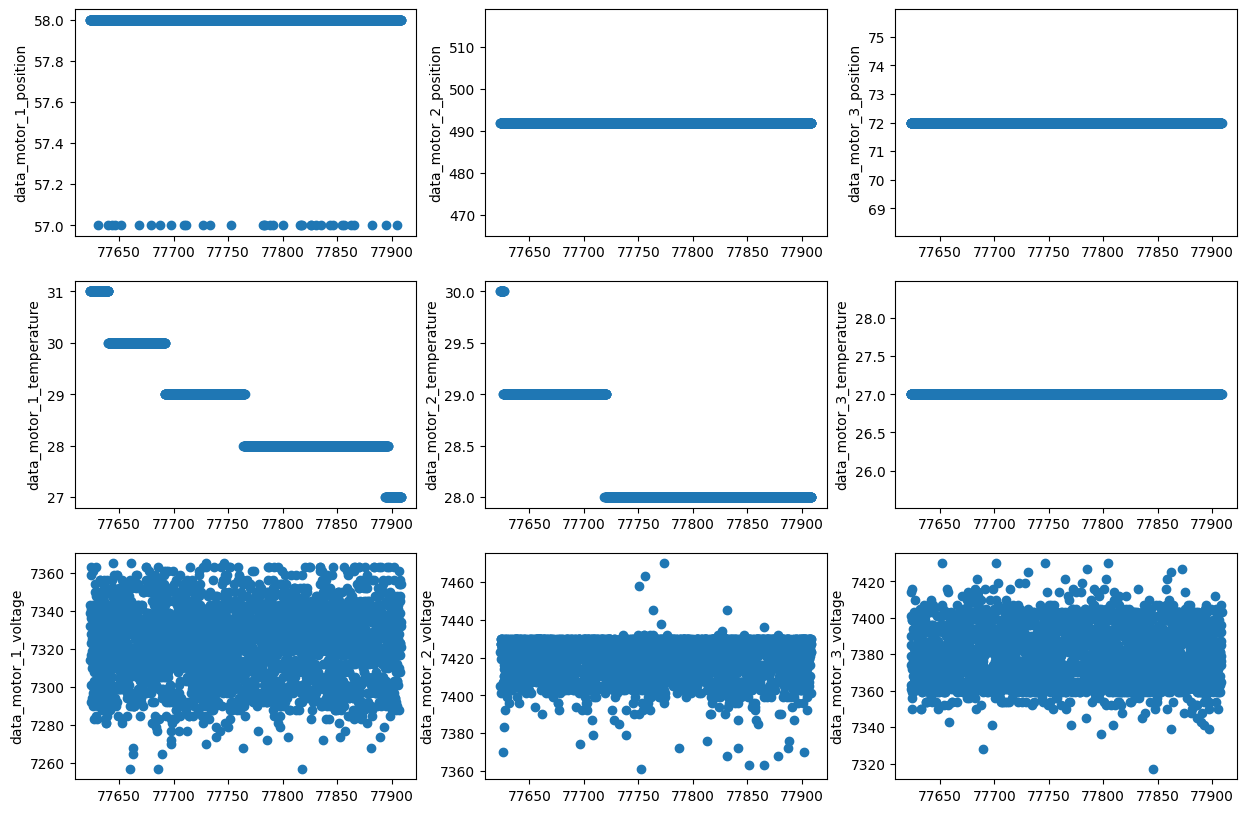

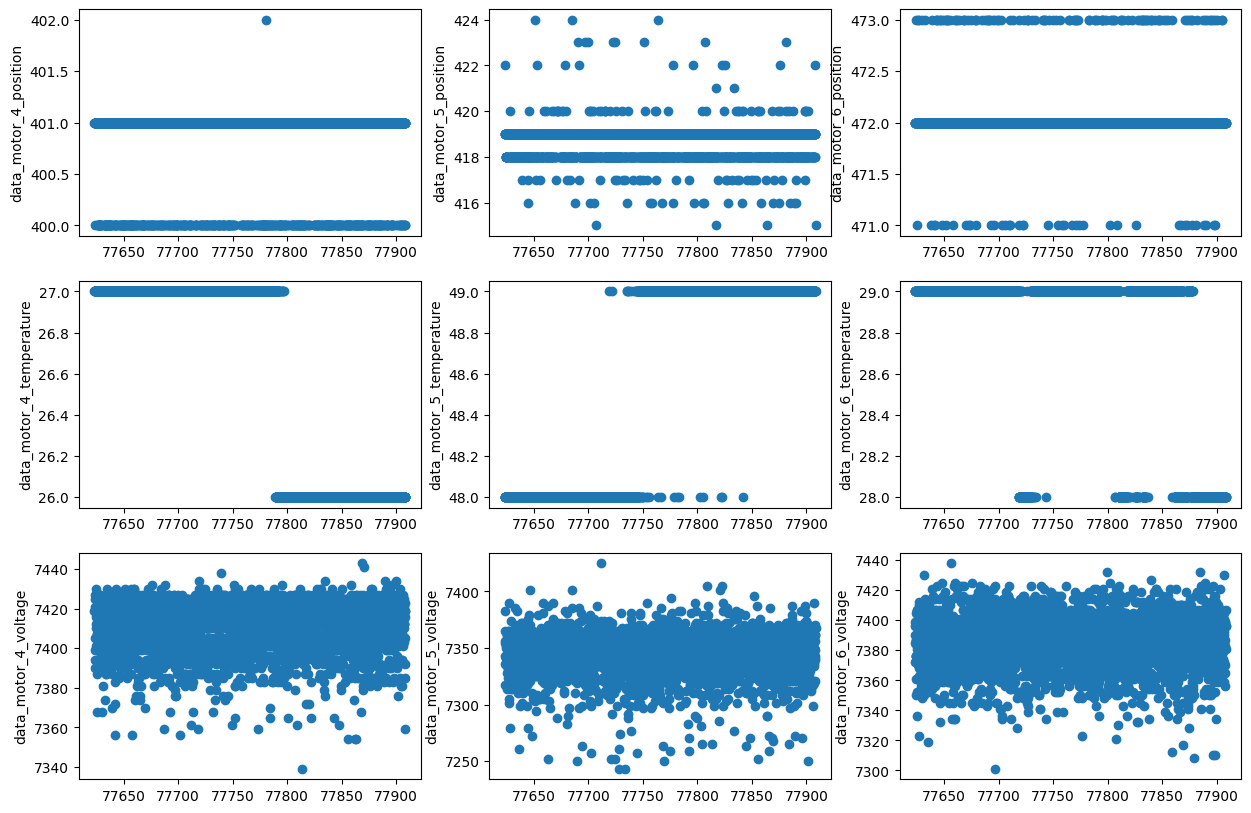

20240320_152031: 3    Not moving
Name: Description, dtype: object



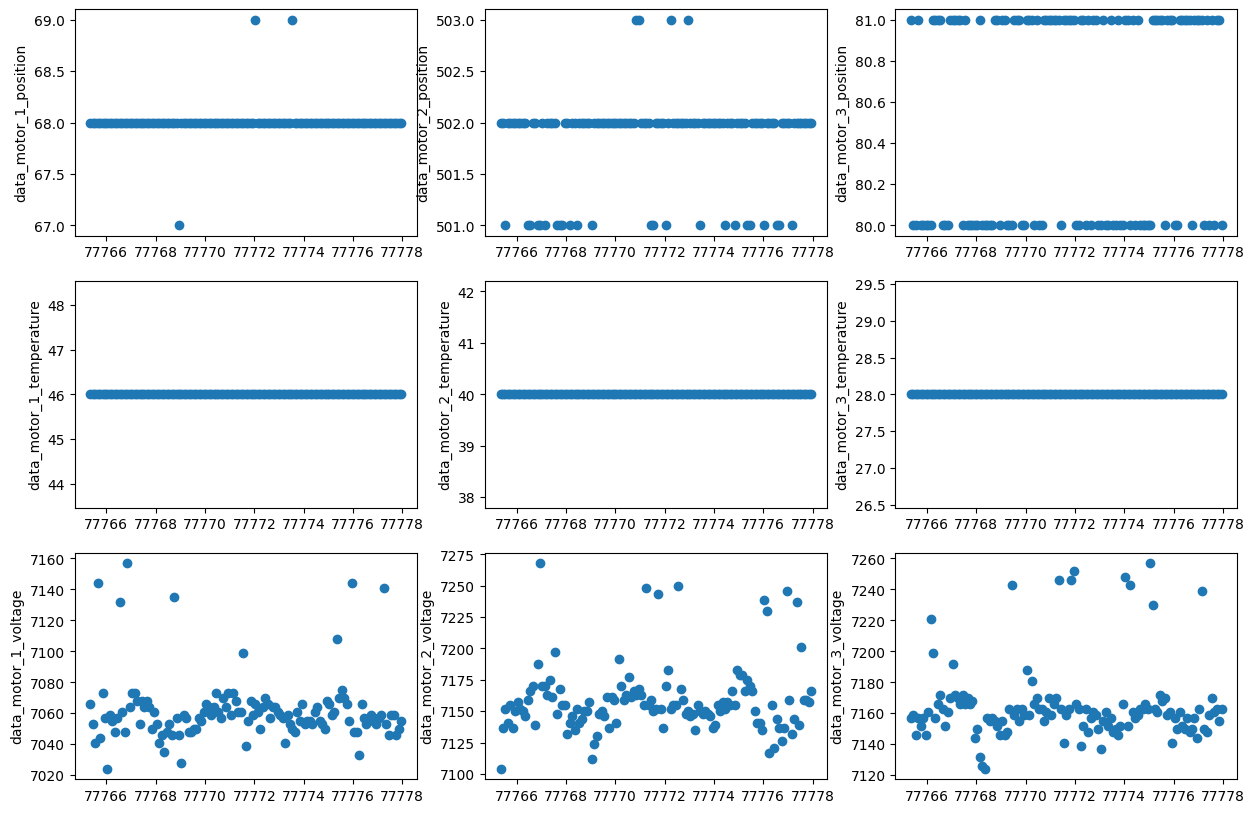

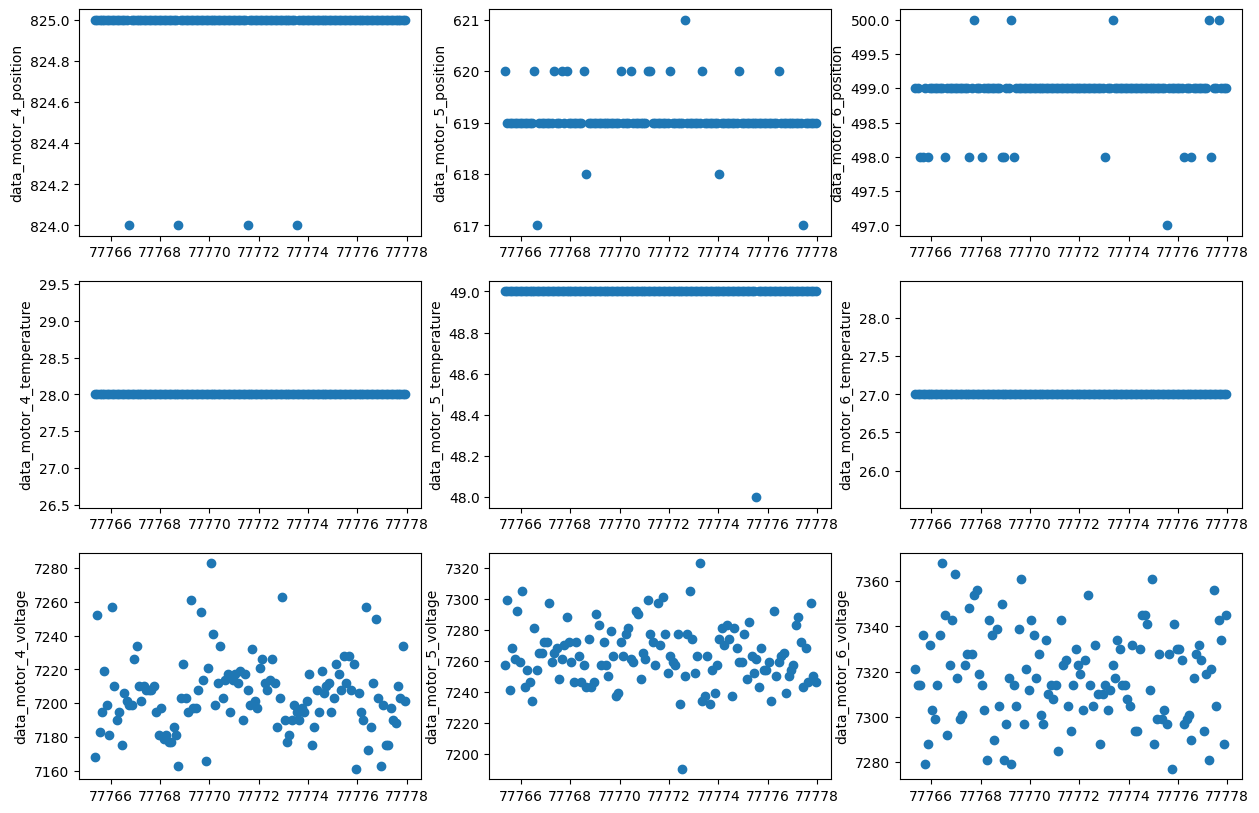

20240320_153841: 4    Move motor 6 -> motor 1 sequentially.
Name: Description, dtype: object



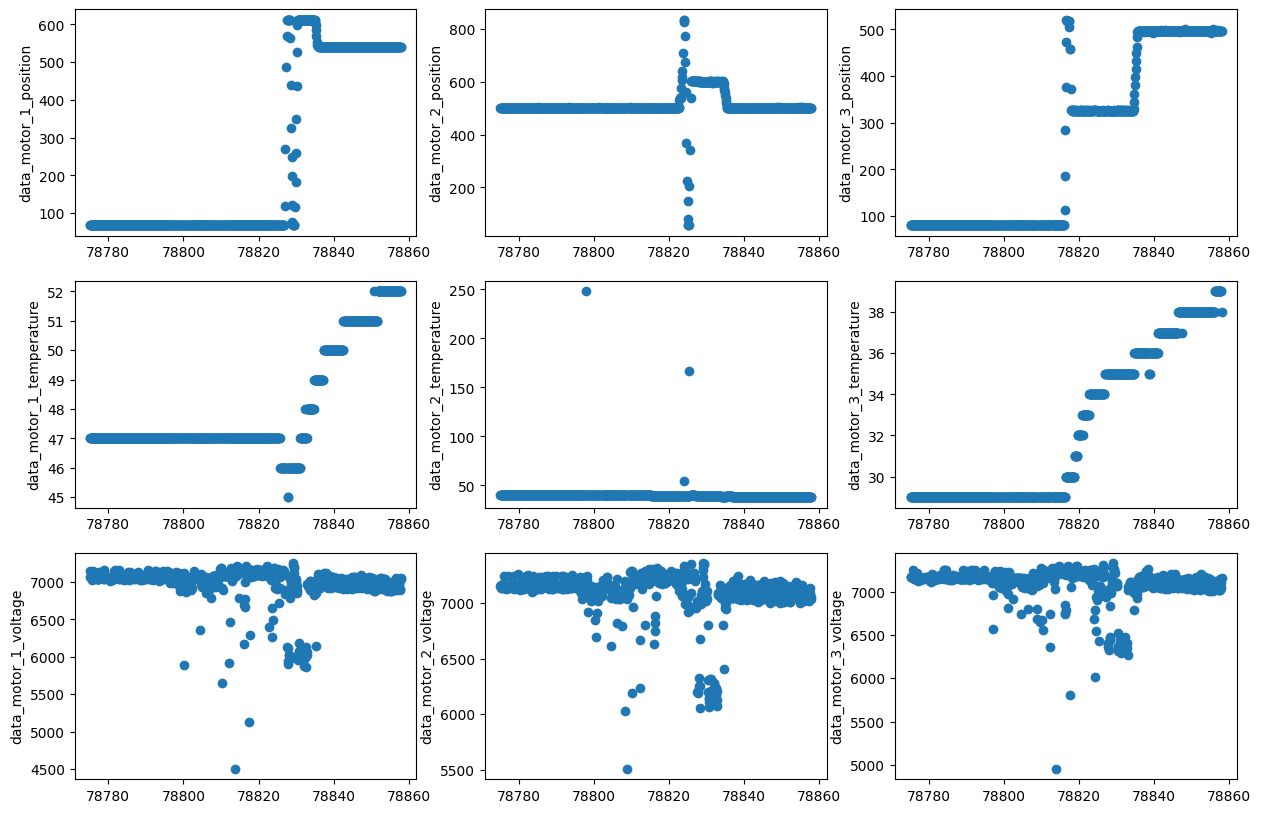

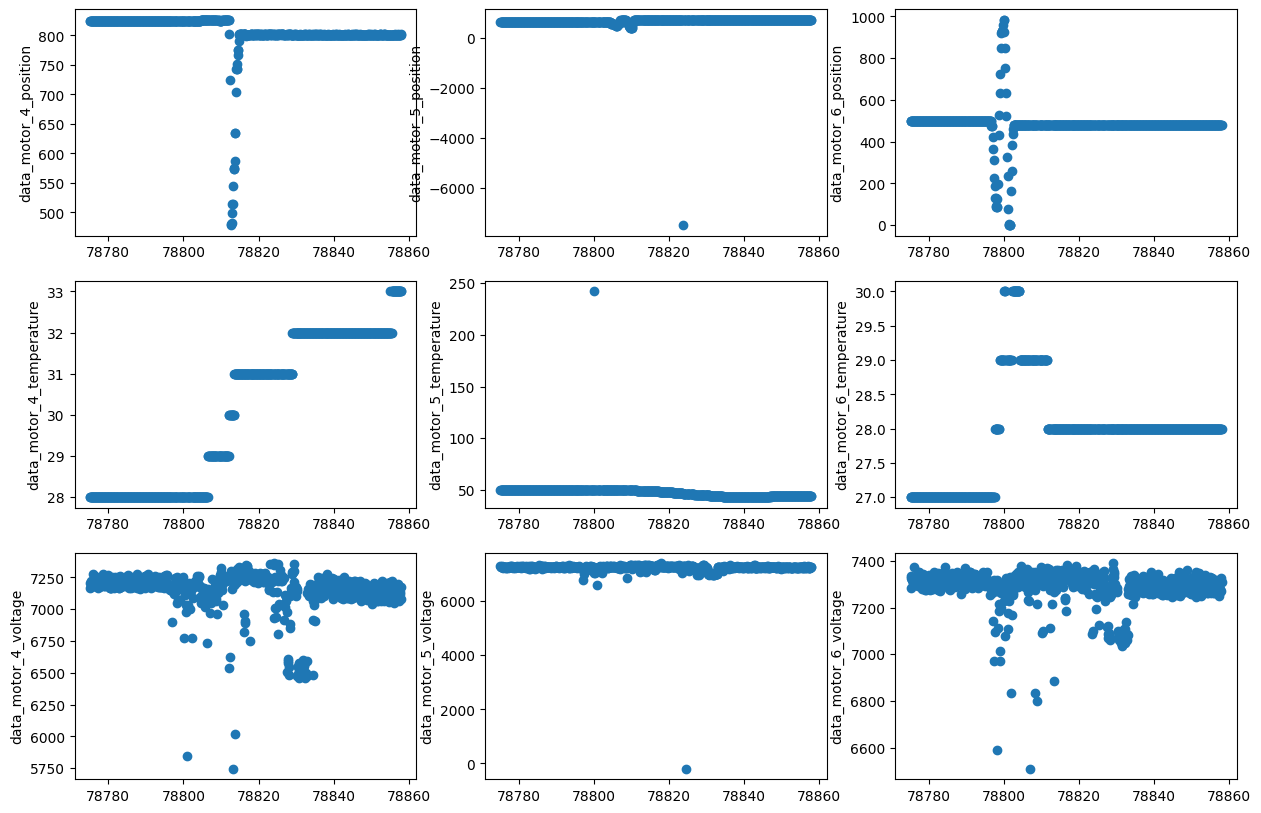

20240320_155664: 5    Not moving
Name: Description, dtype: object



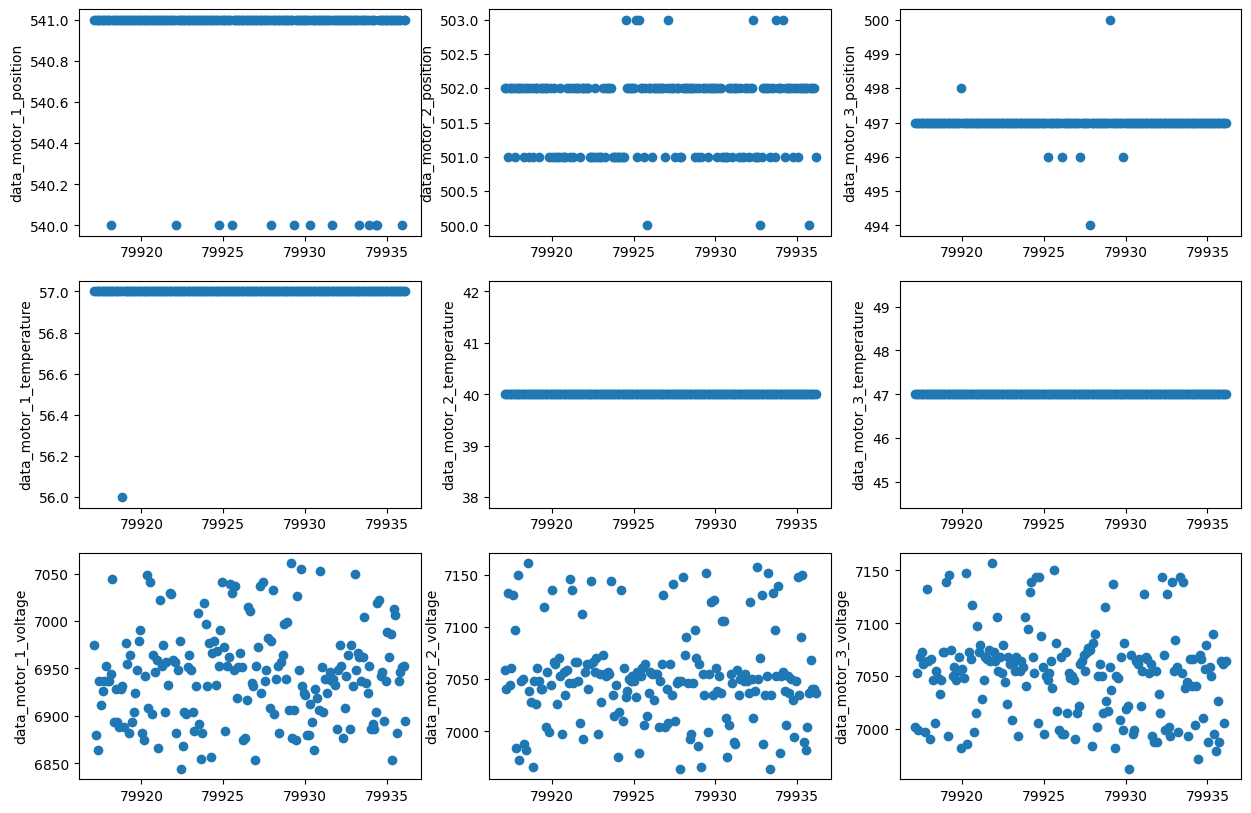

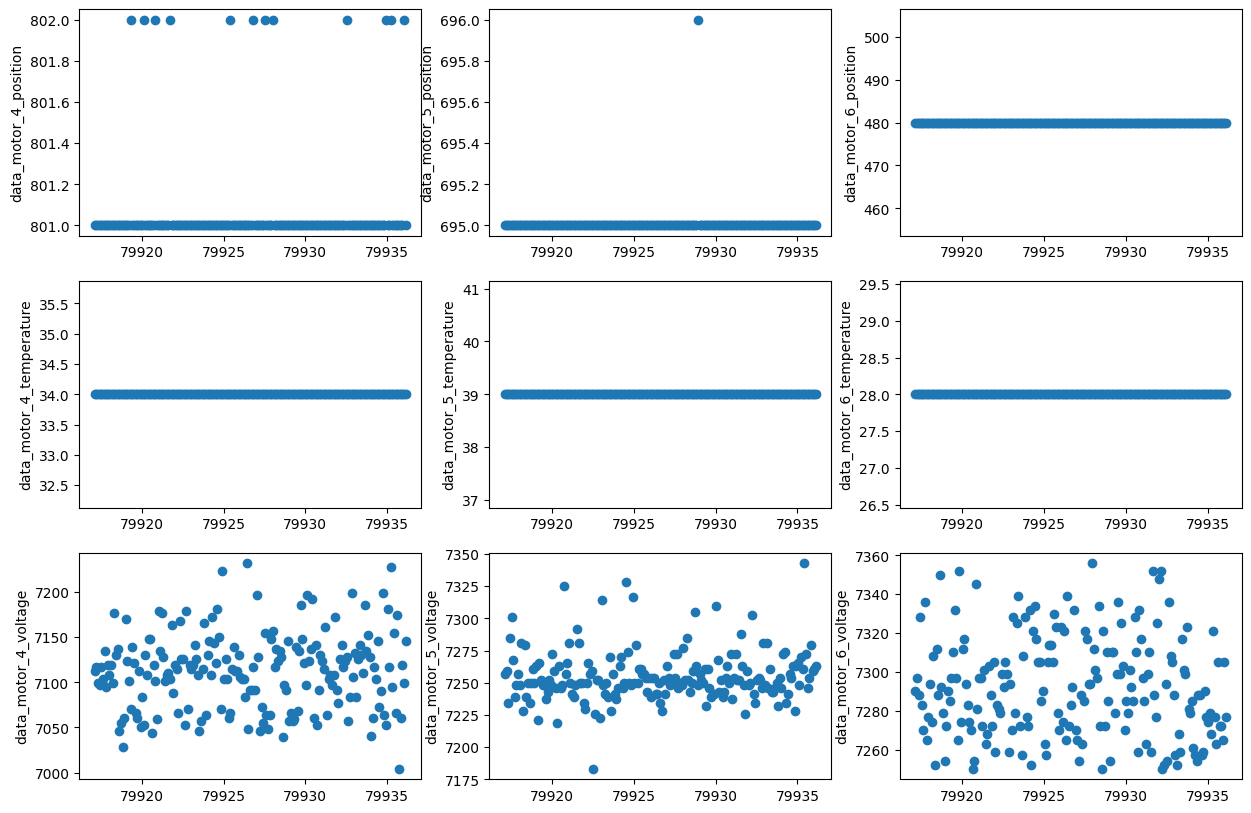

20240321_122650: 6    Pick up and place
Name: Description, dtype: object



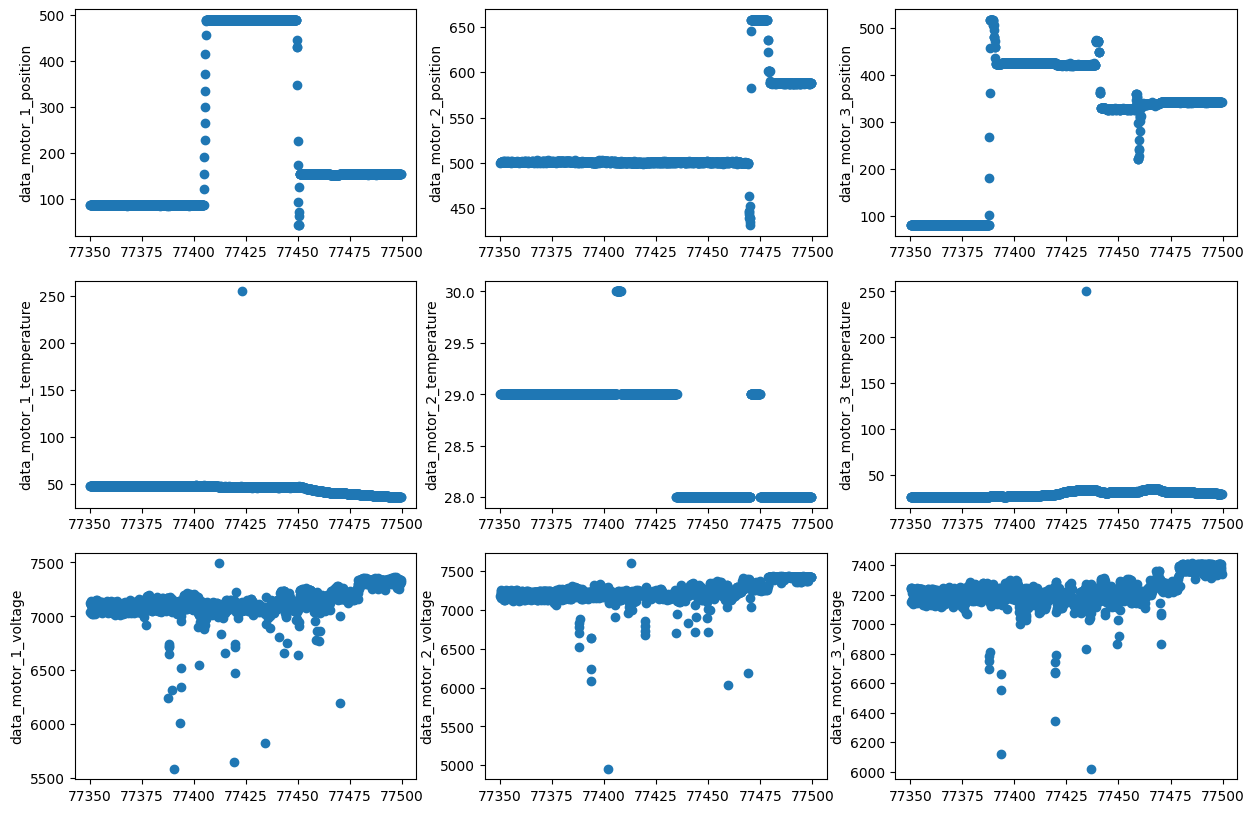

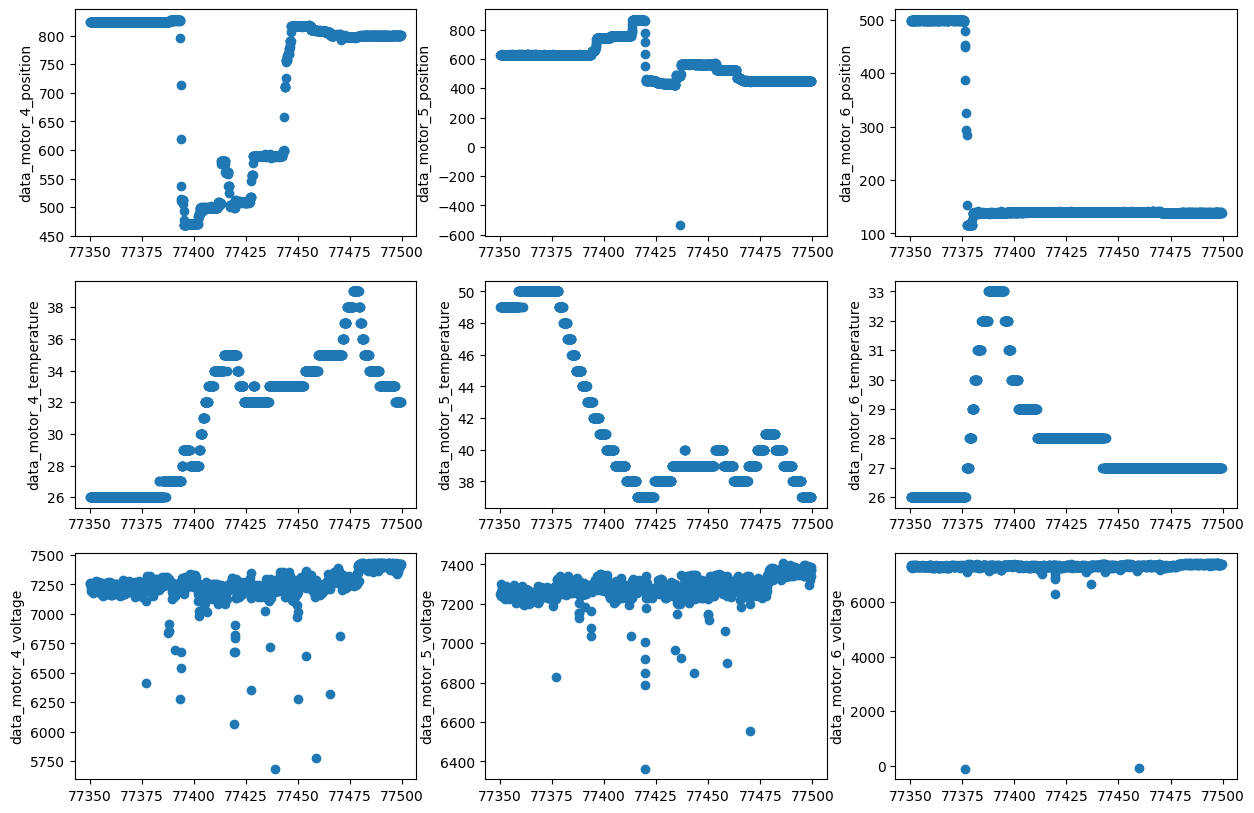

20240325_135213: 7    Not moving
Name: Description, dtype: object



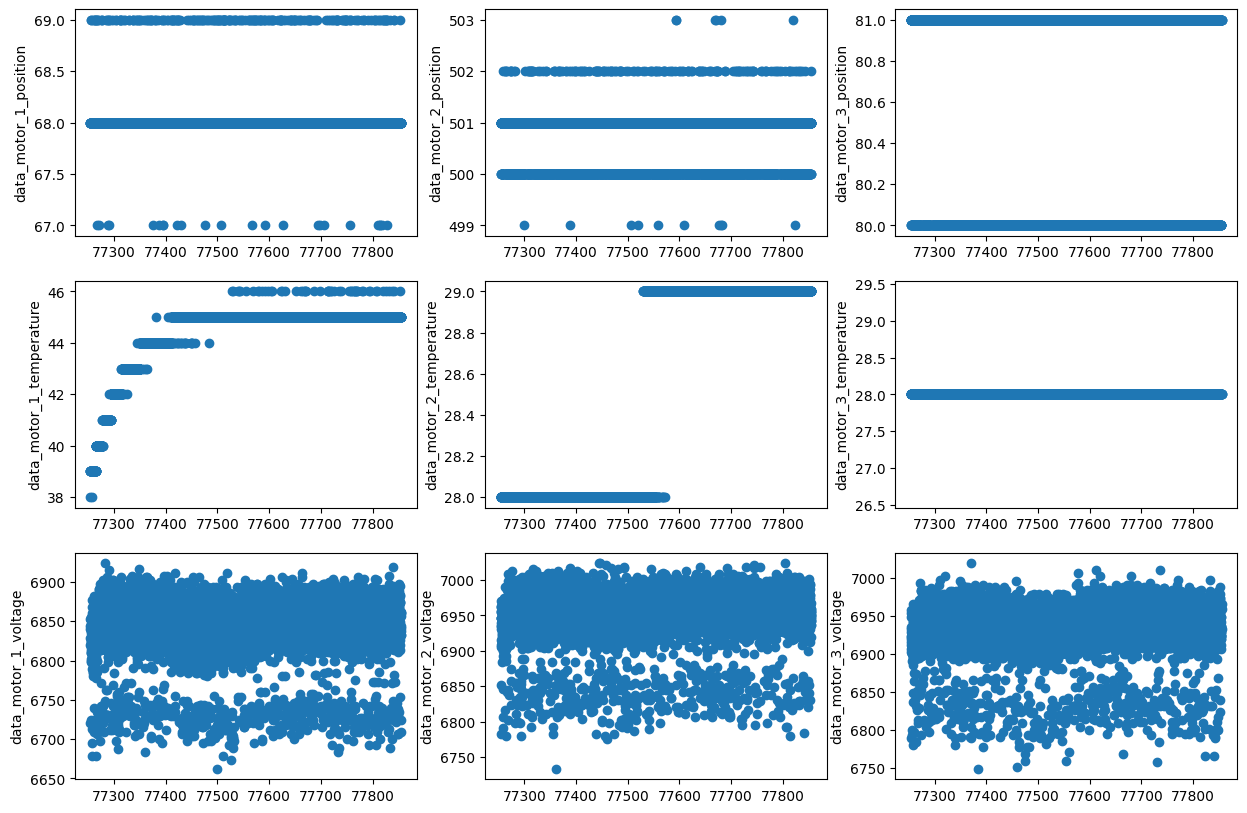

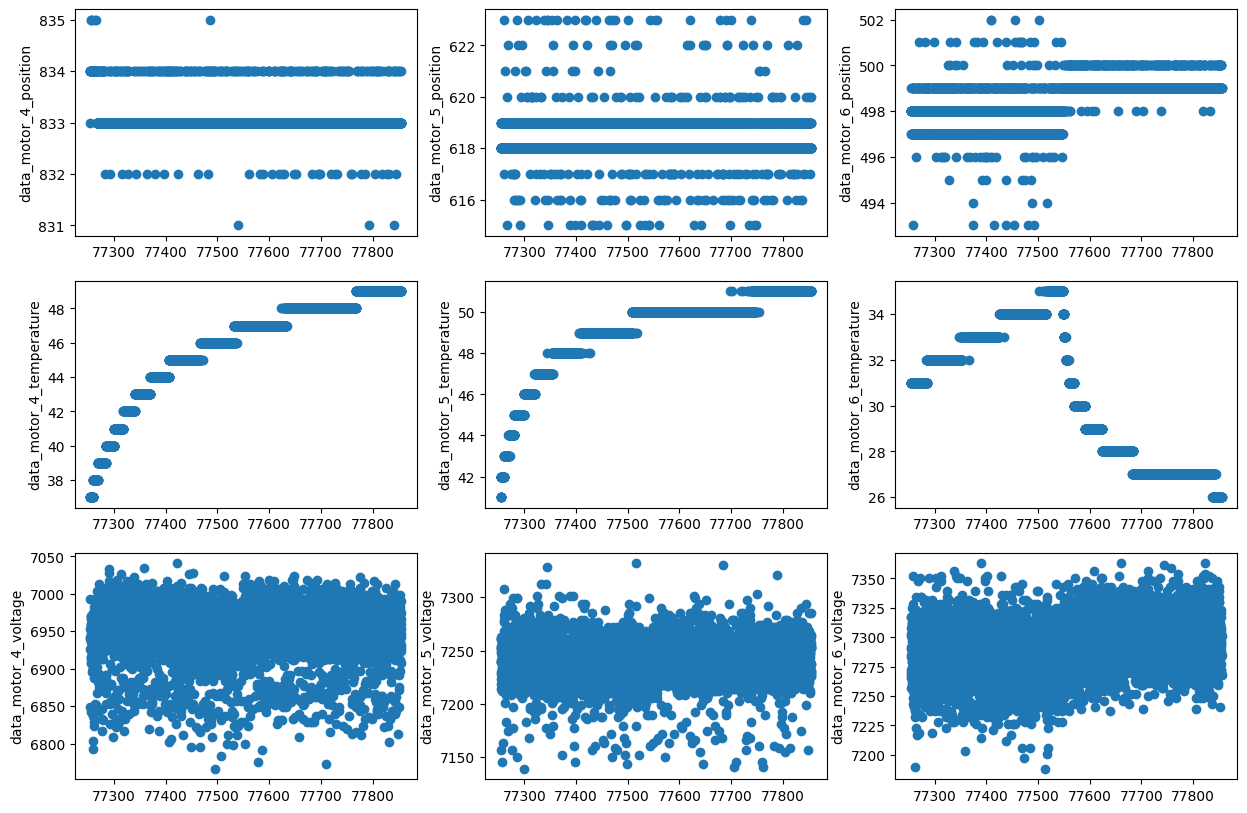

20240325_152902: 8    Pick up and place
Name: Description, dtype: object



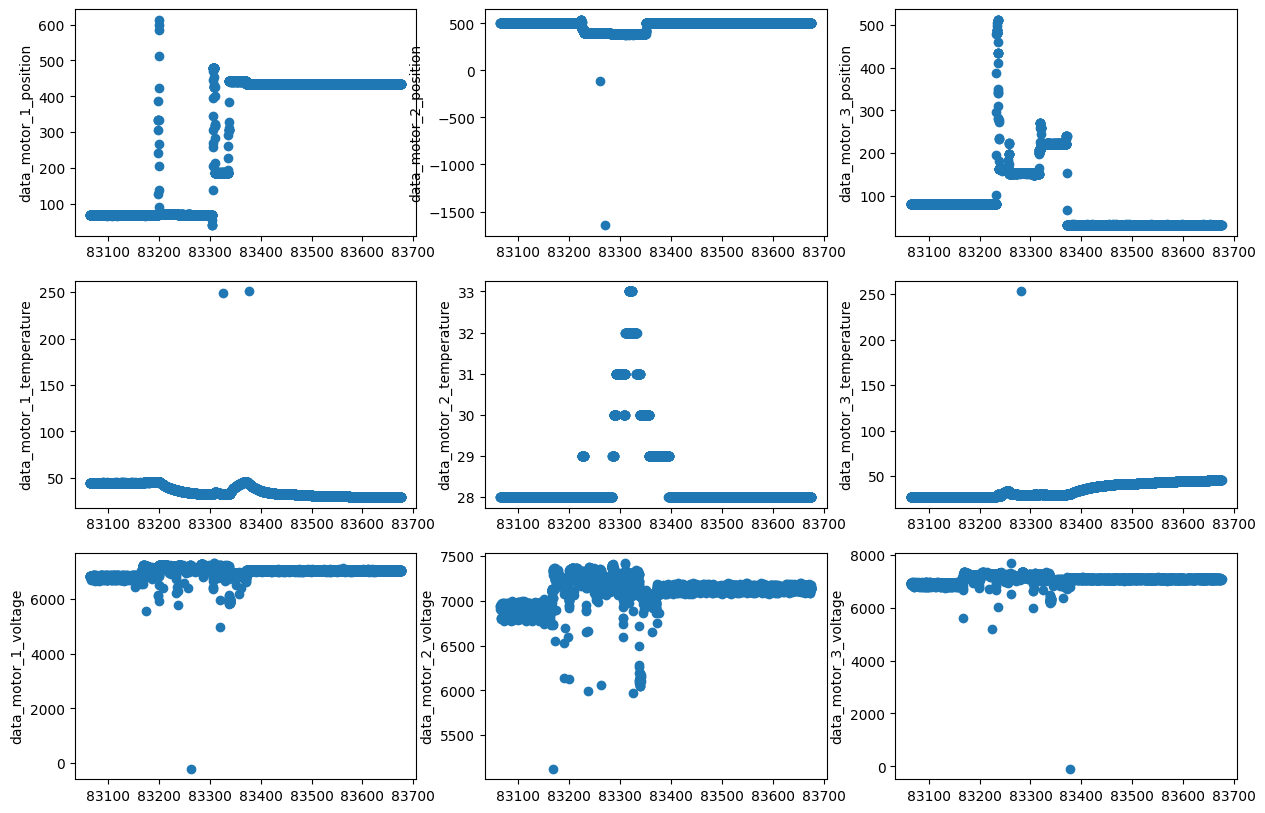

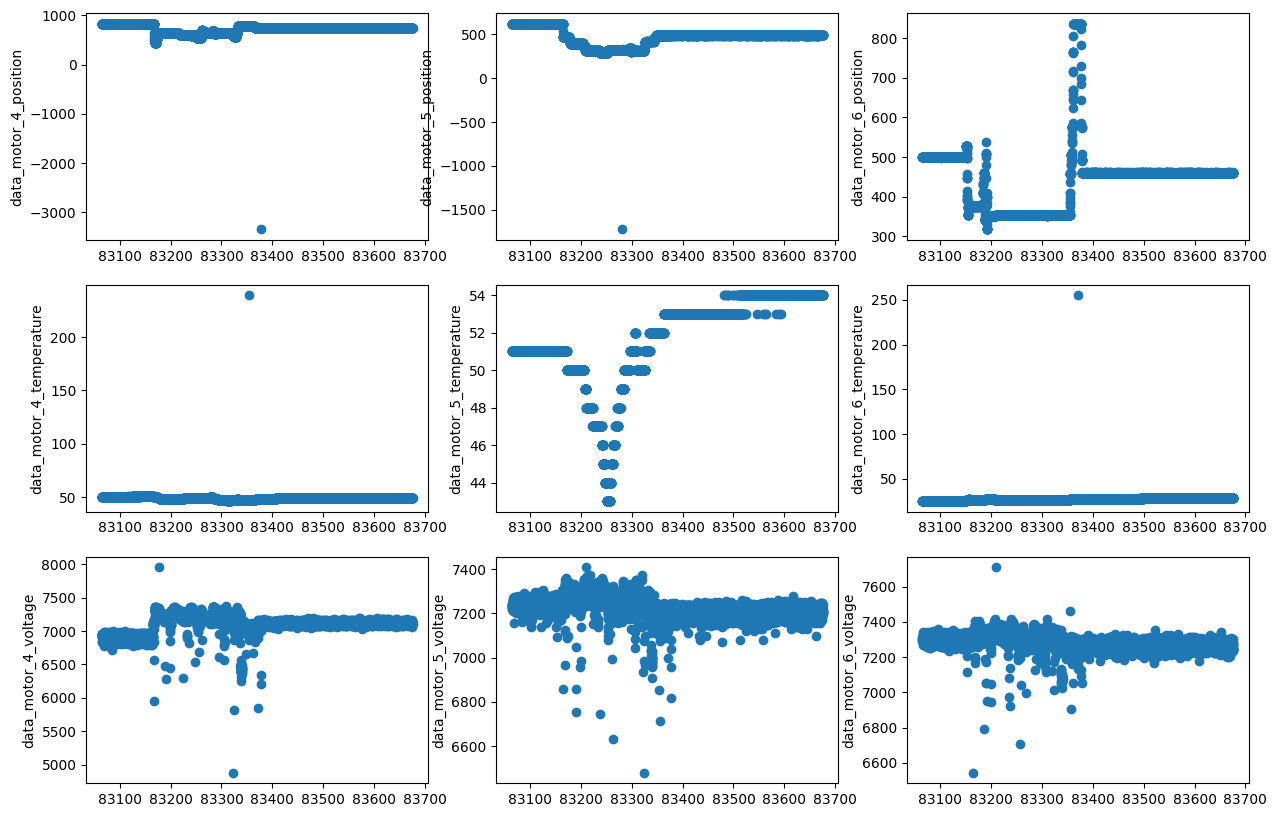

20240325_155003: 9    Pick up and place
Name: Description, dtype: object



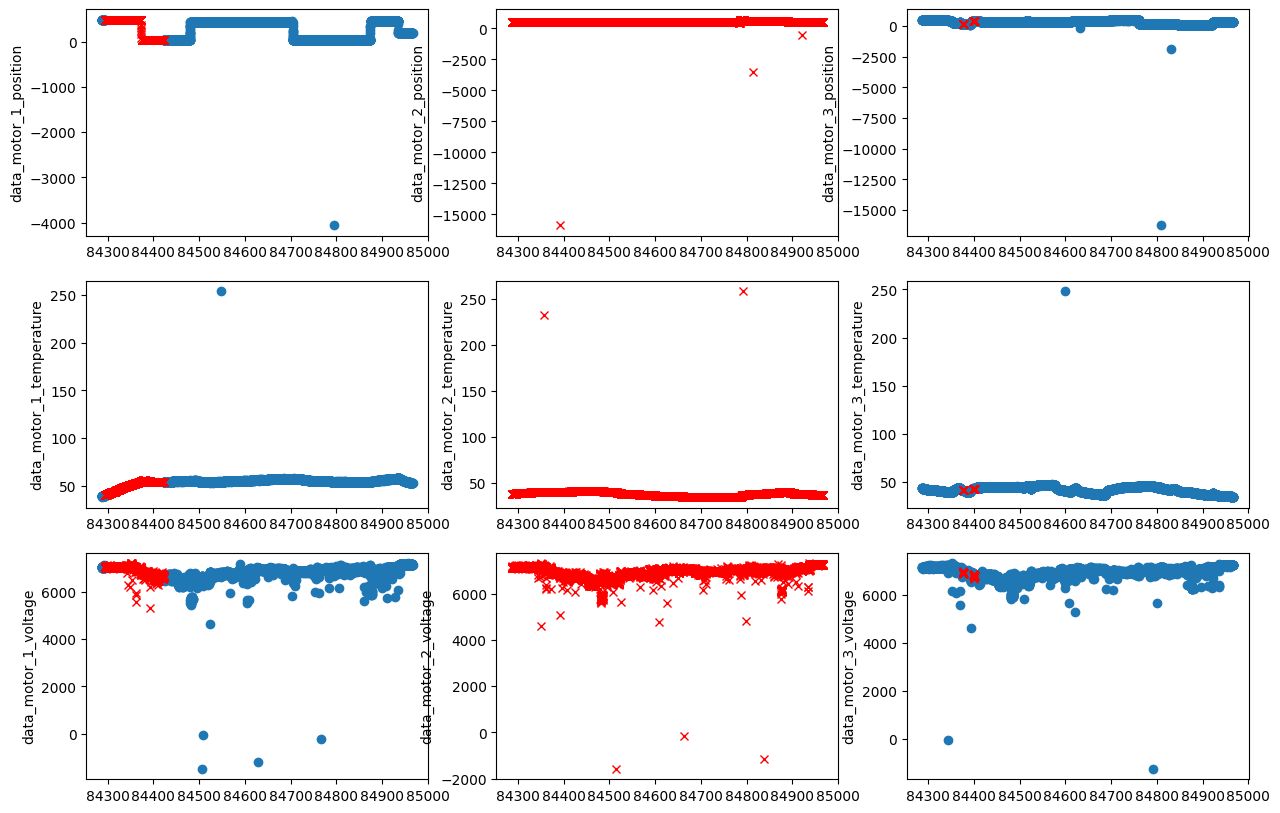

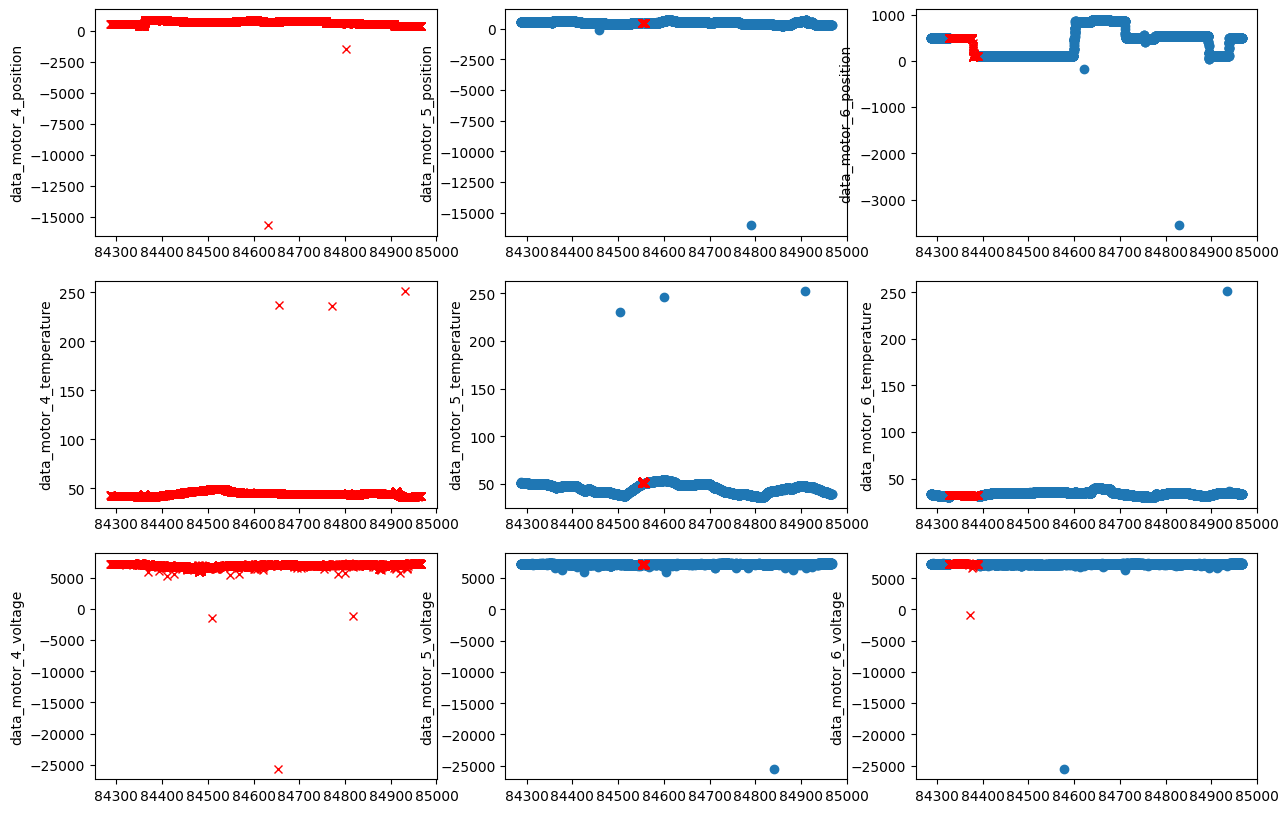

20240425_093699: 10    Not moving
Name: Description, dtype: object



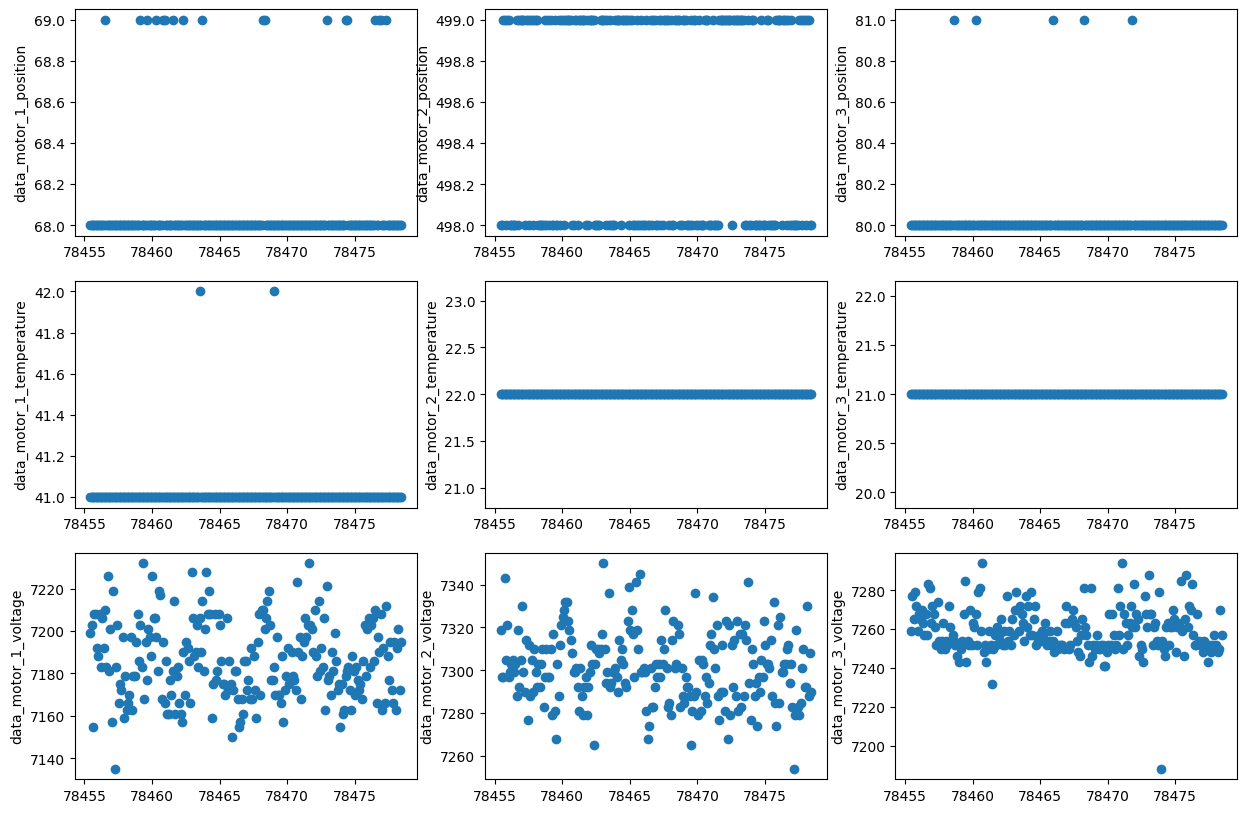

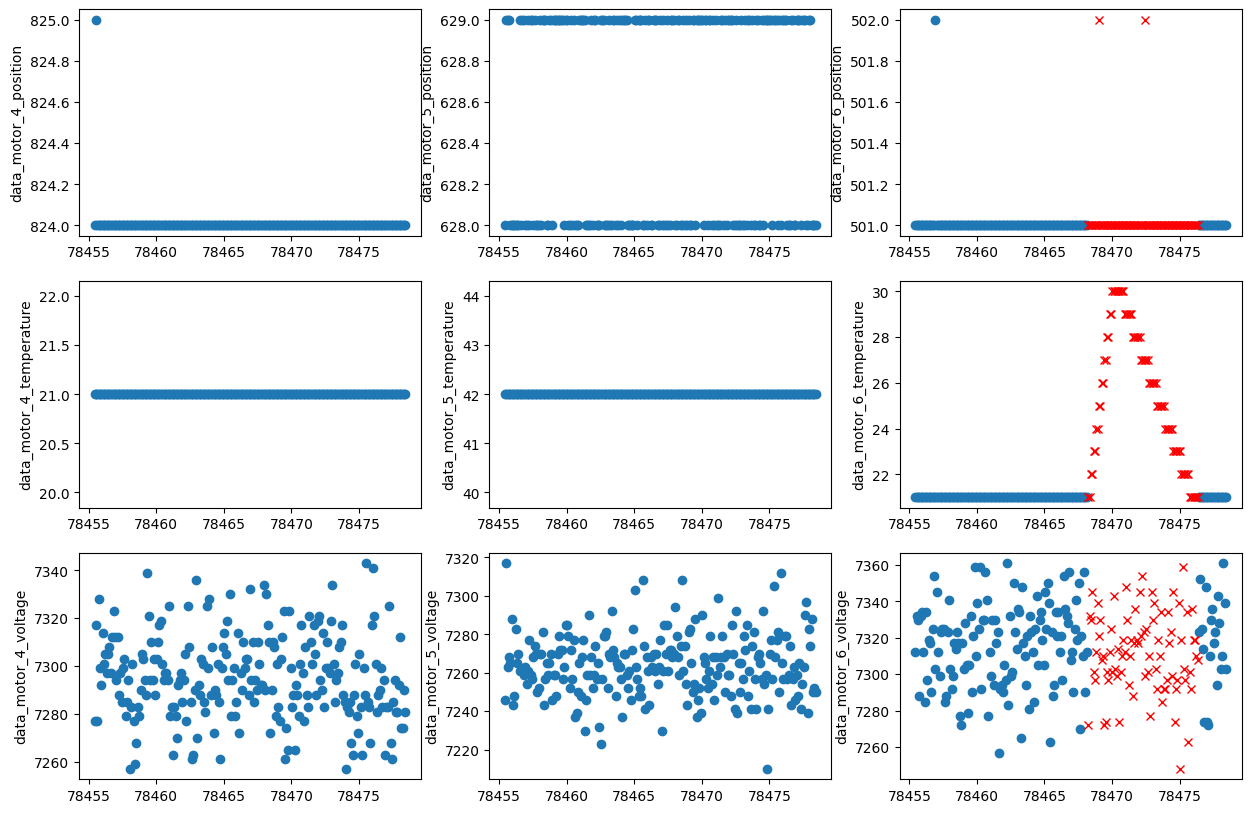

20240425_094425: 11    Not moving
Name: Description, dtype: object



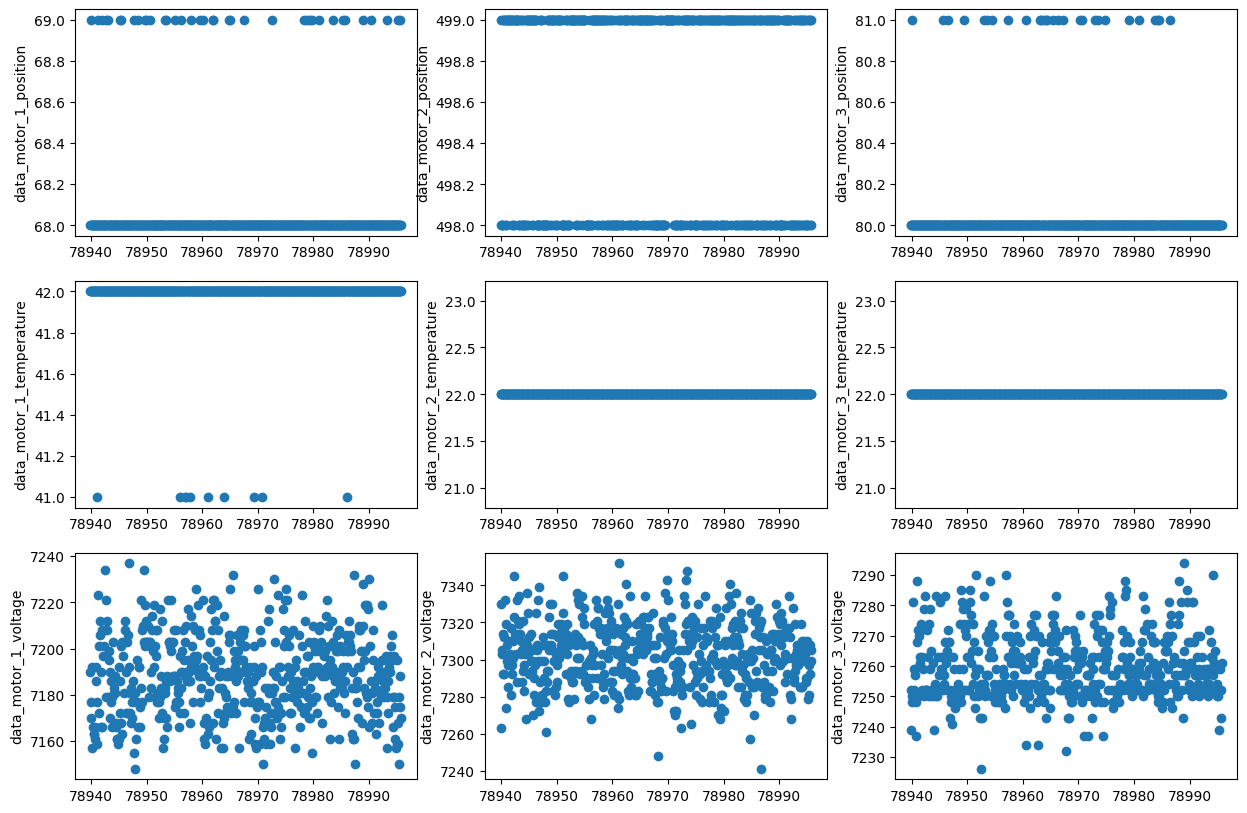

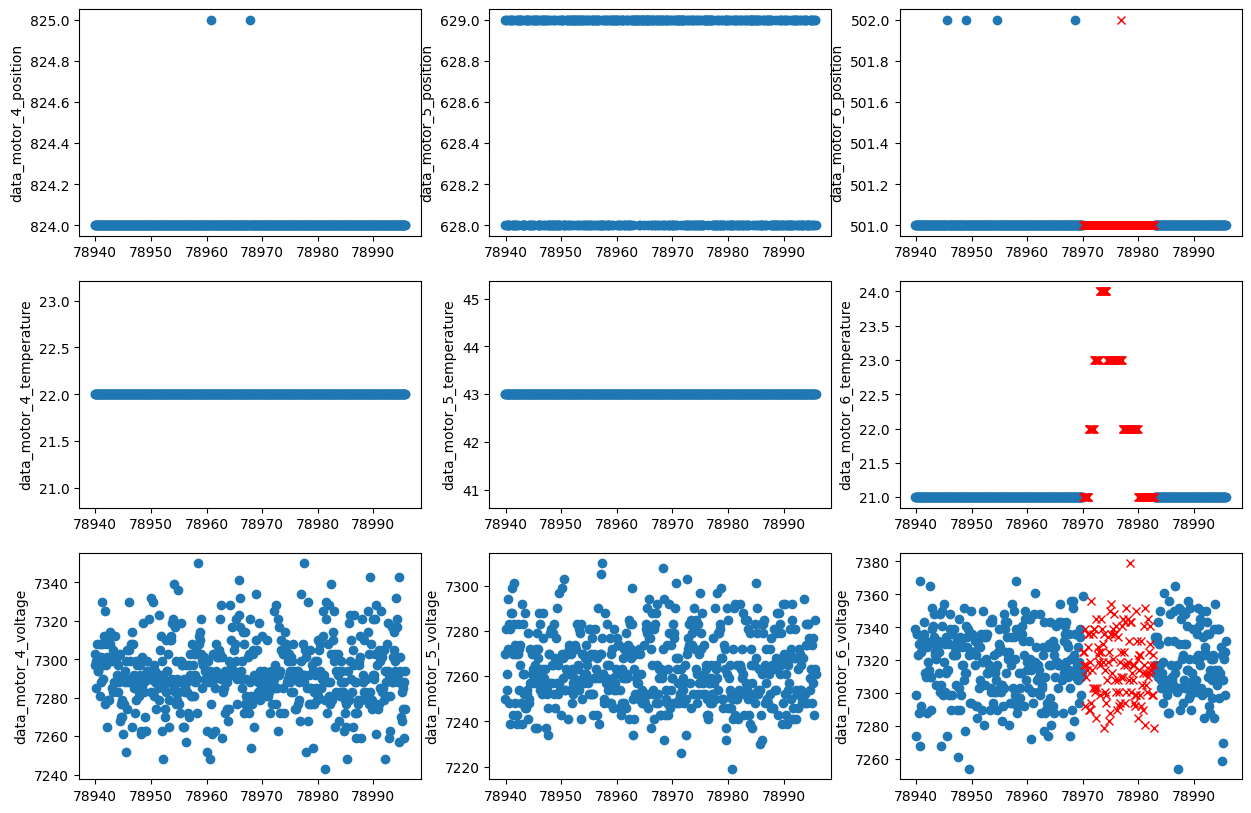

20240426_140055: 12    Not moving
Name: Description, dtype: object



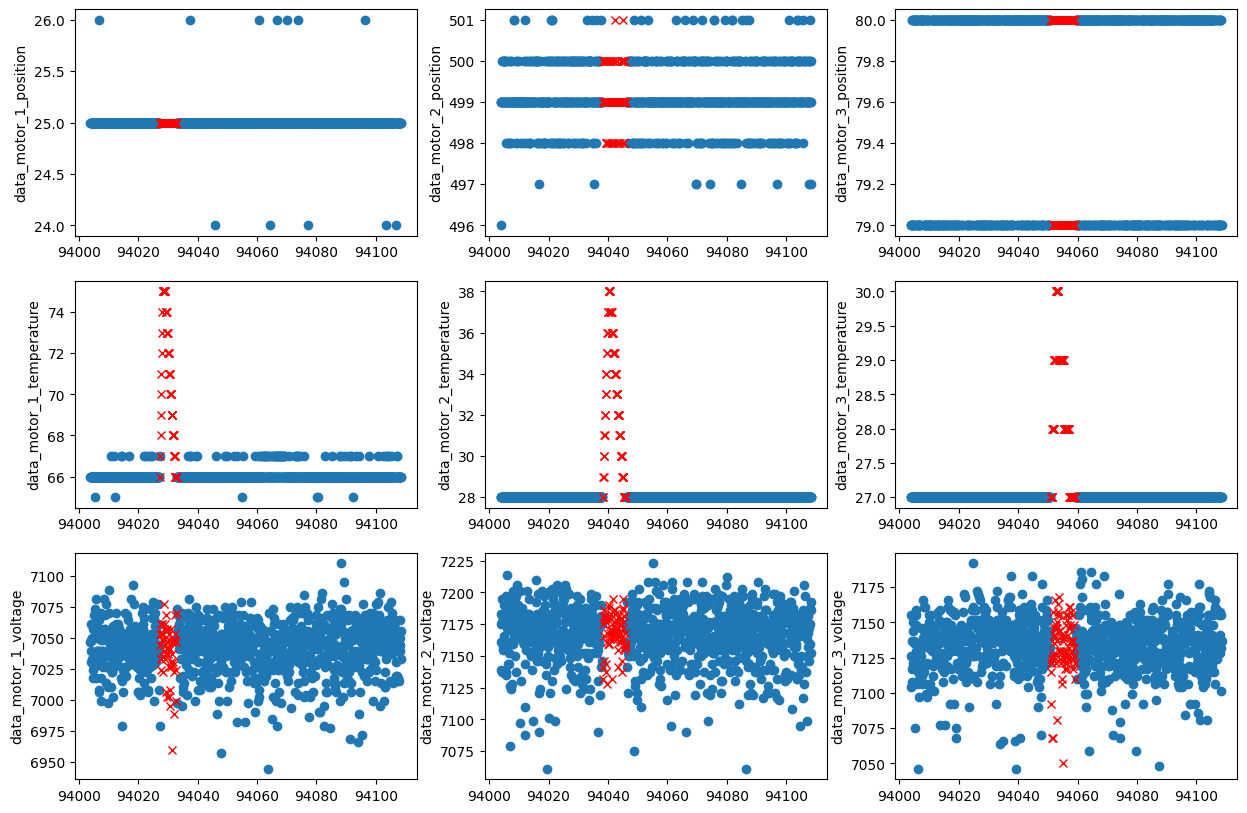

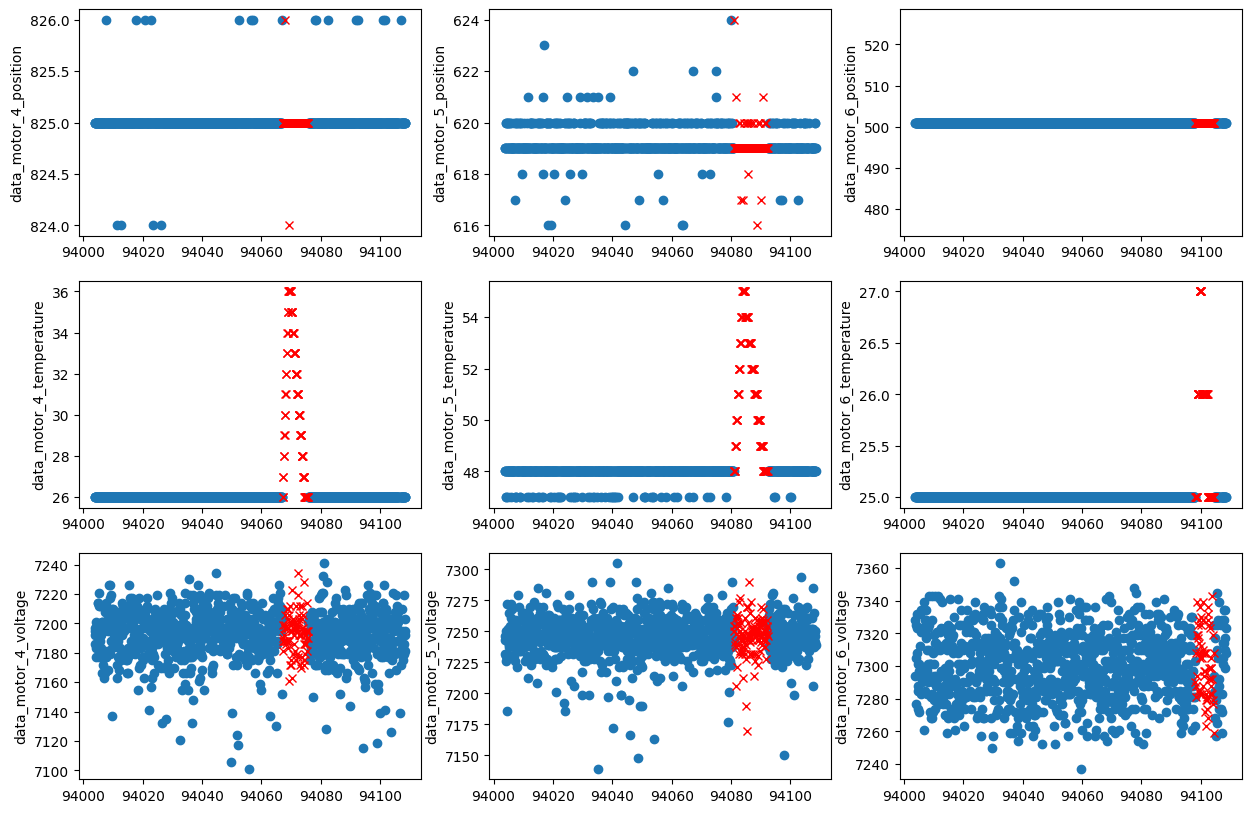

20240426_141190: 13    Pick up and place
Name: Description, dtype: object



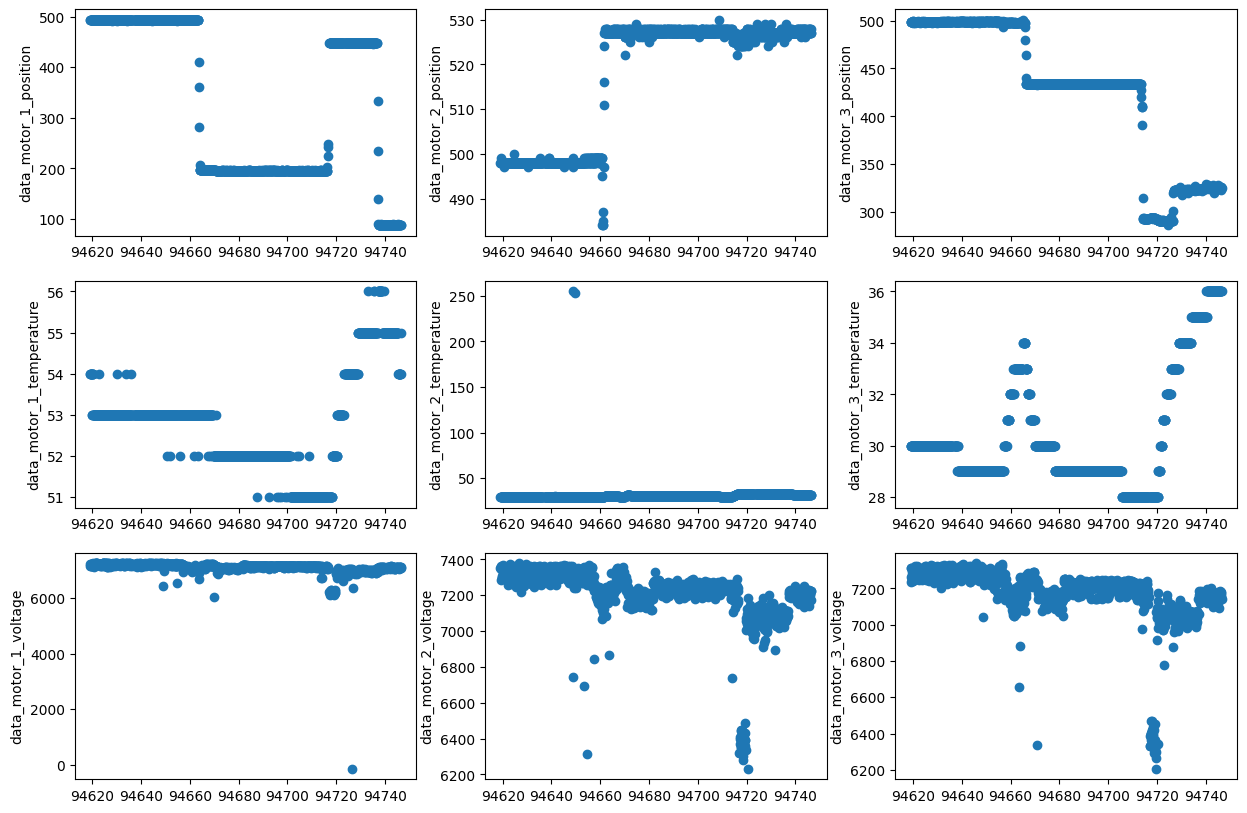

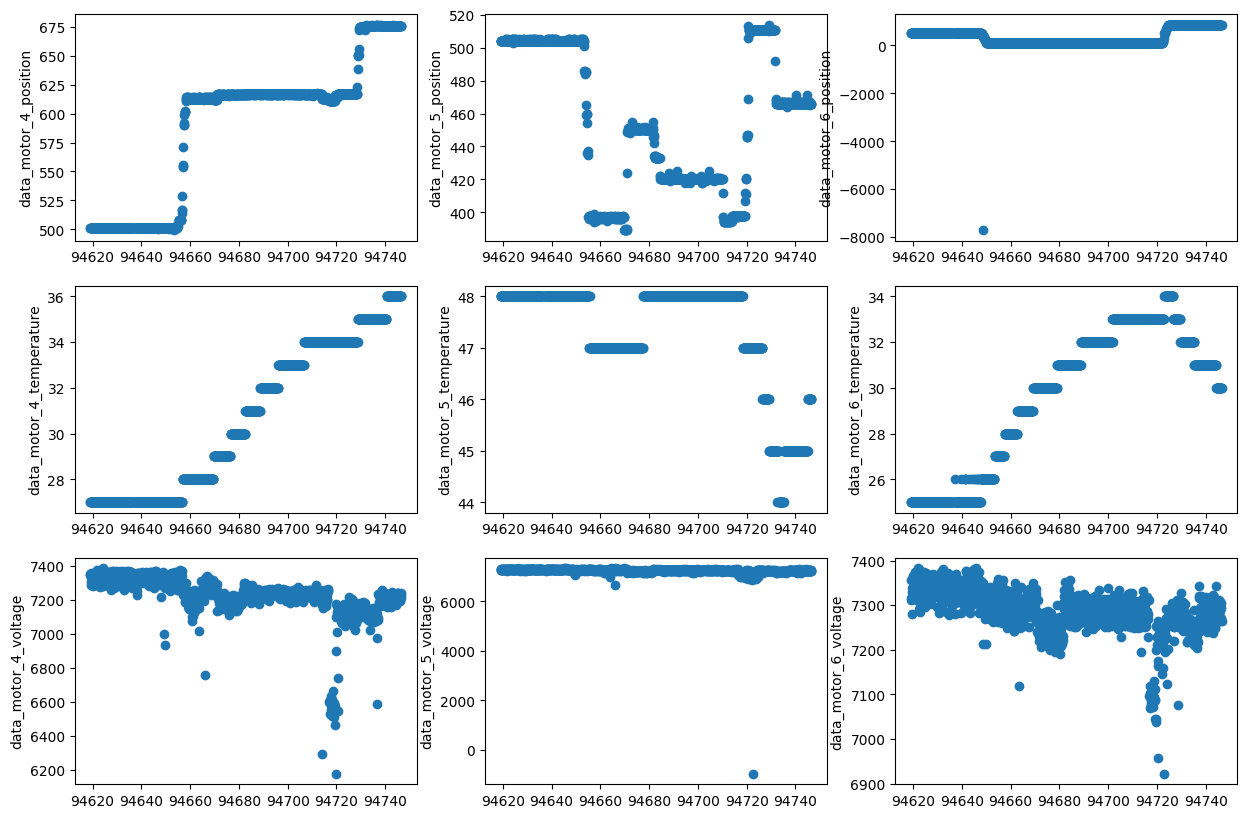

20240426_141532: 14    Moving one motor
Name: Description, dtype: object



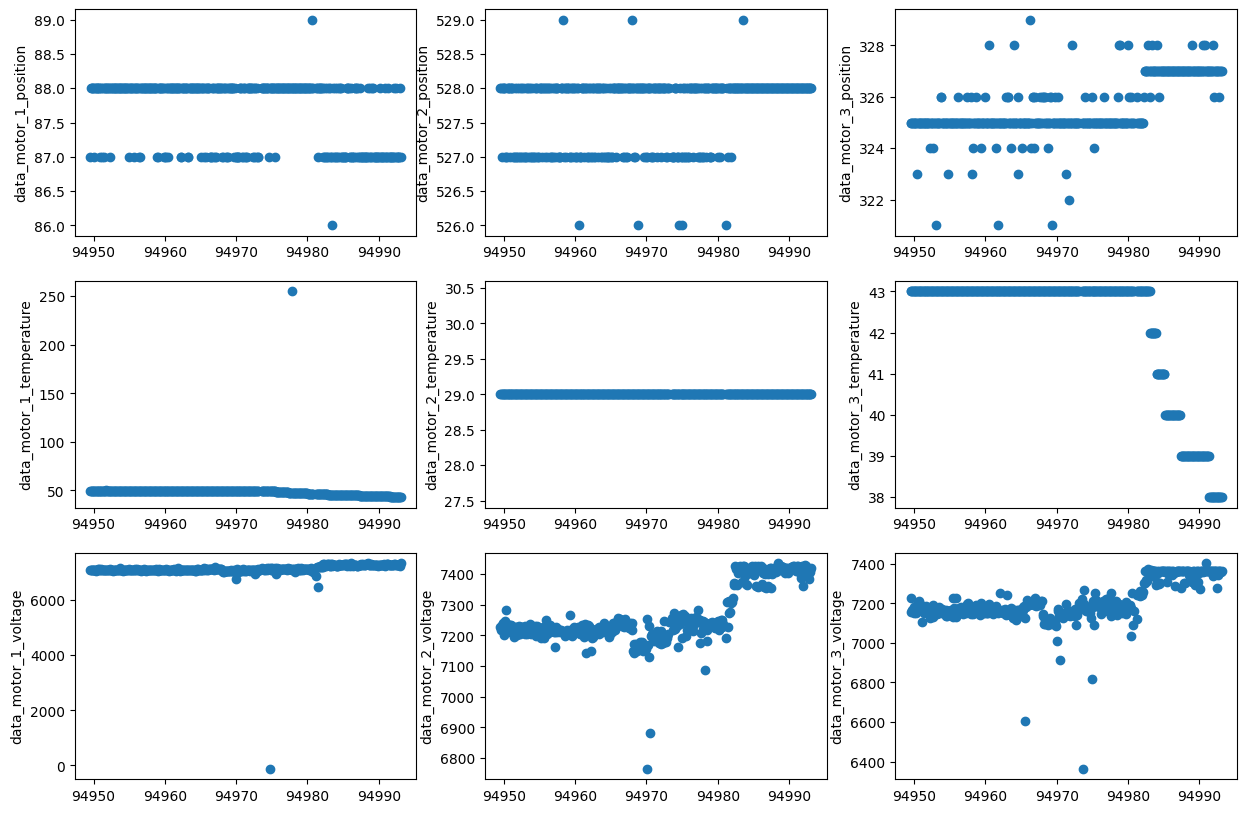

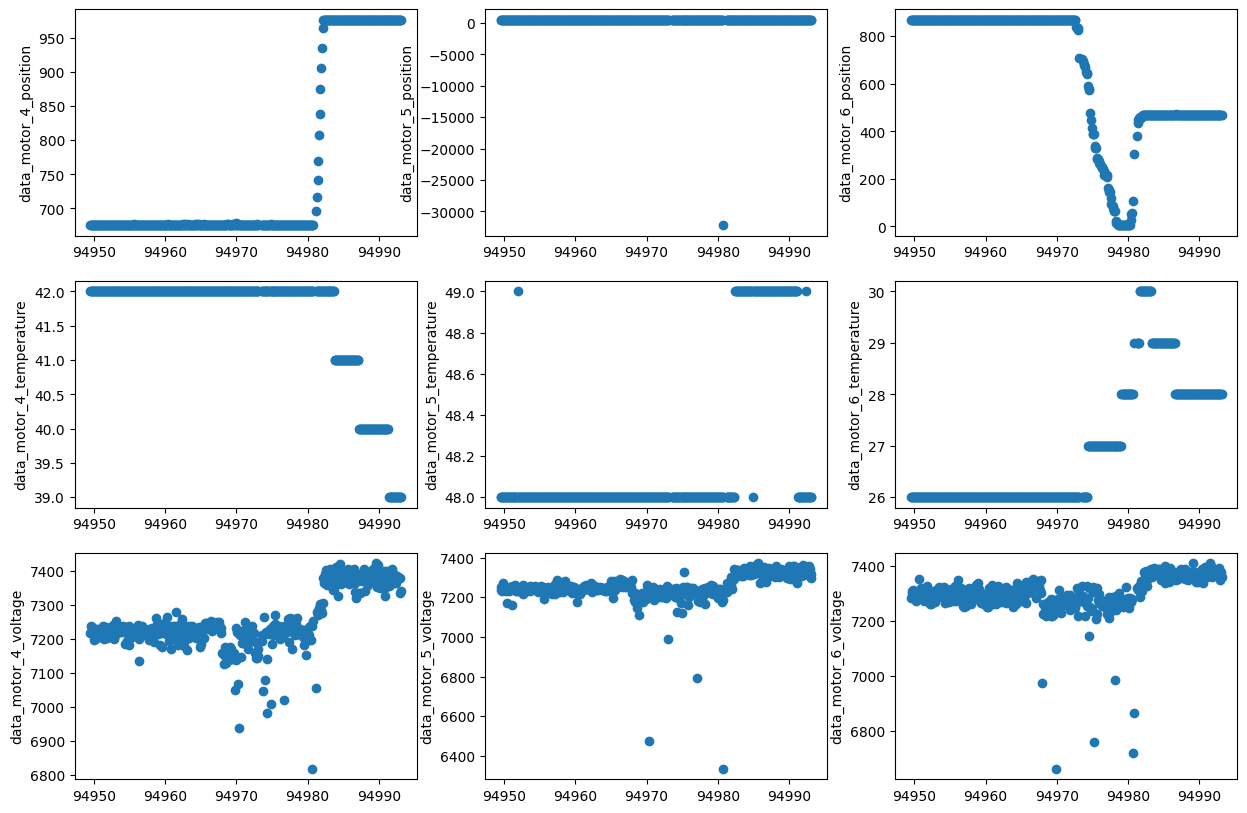

20240426_141602: 15    Moving one motor
Name: Description, dtype: object



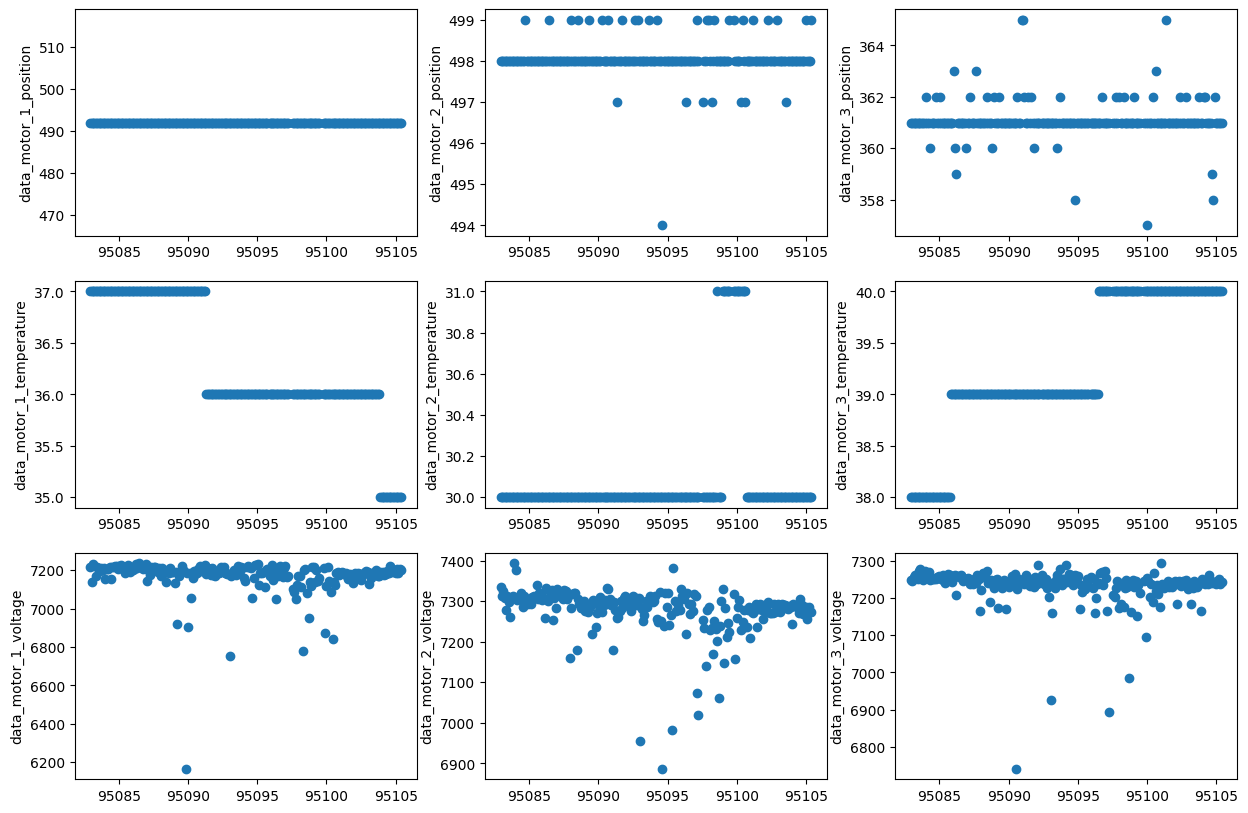

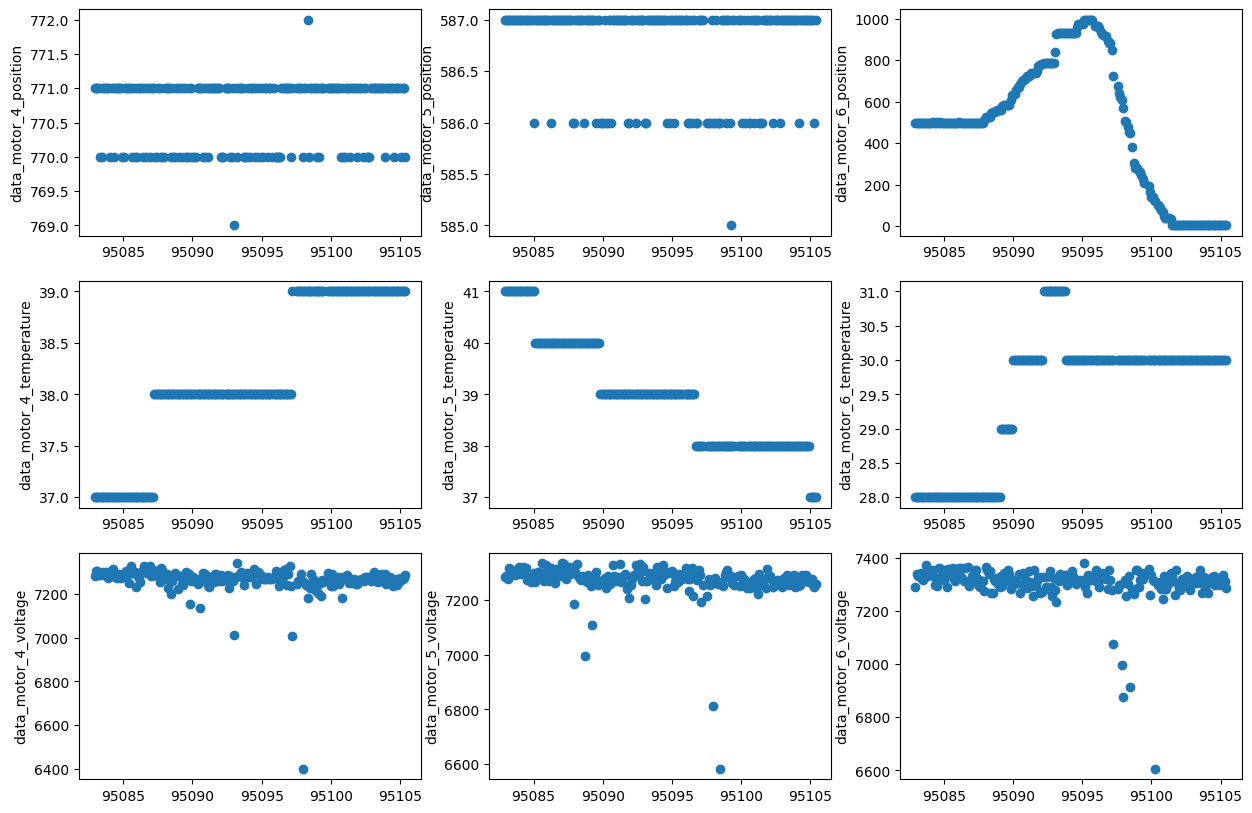

20240426_141726: 16    Moving one motor
Name: Description, dtype: object



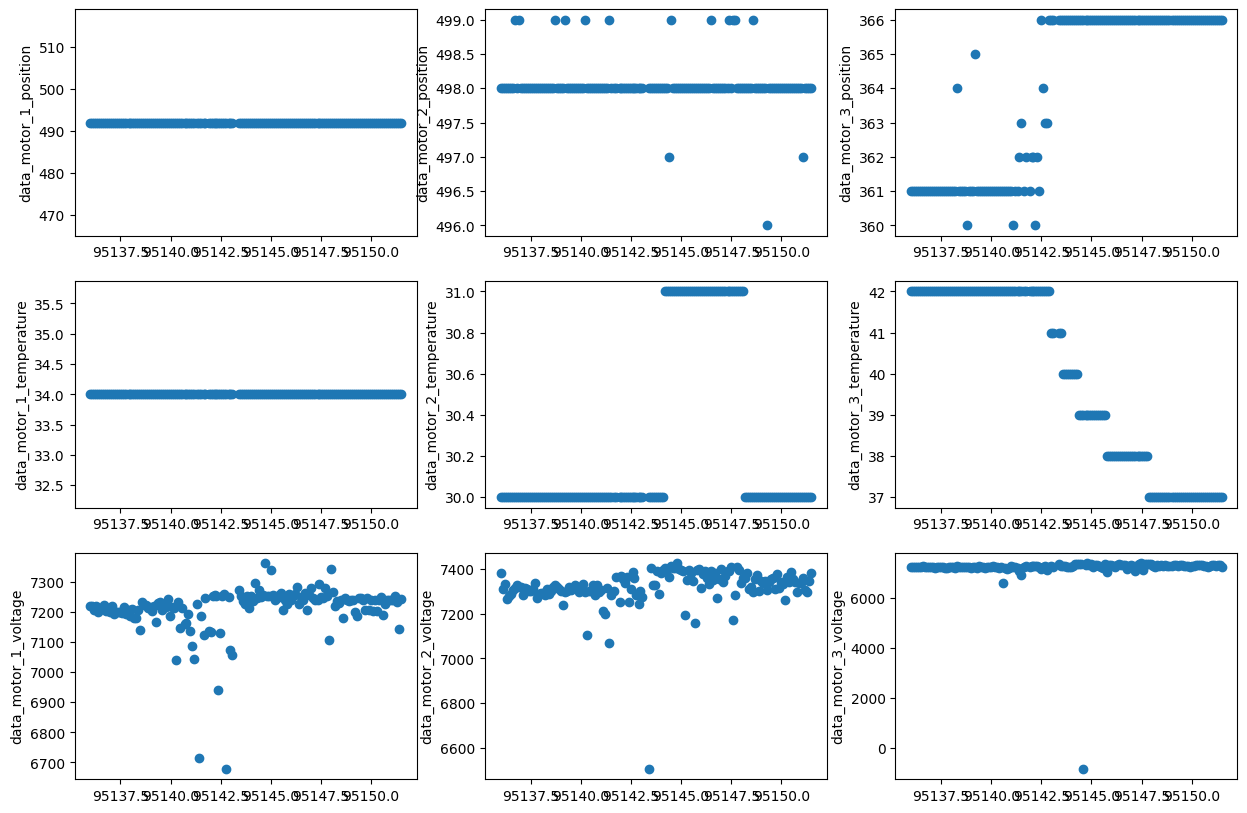

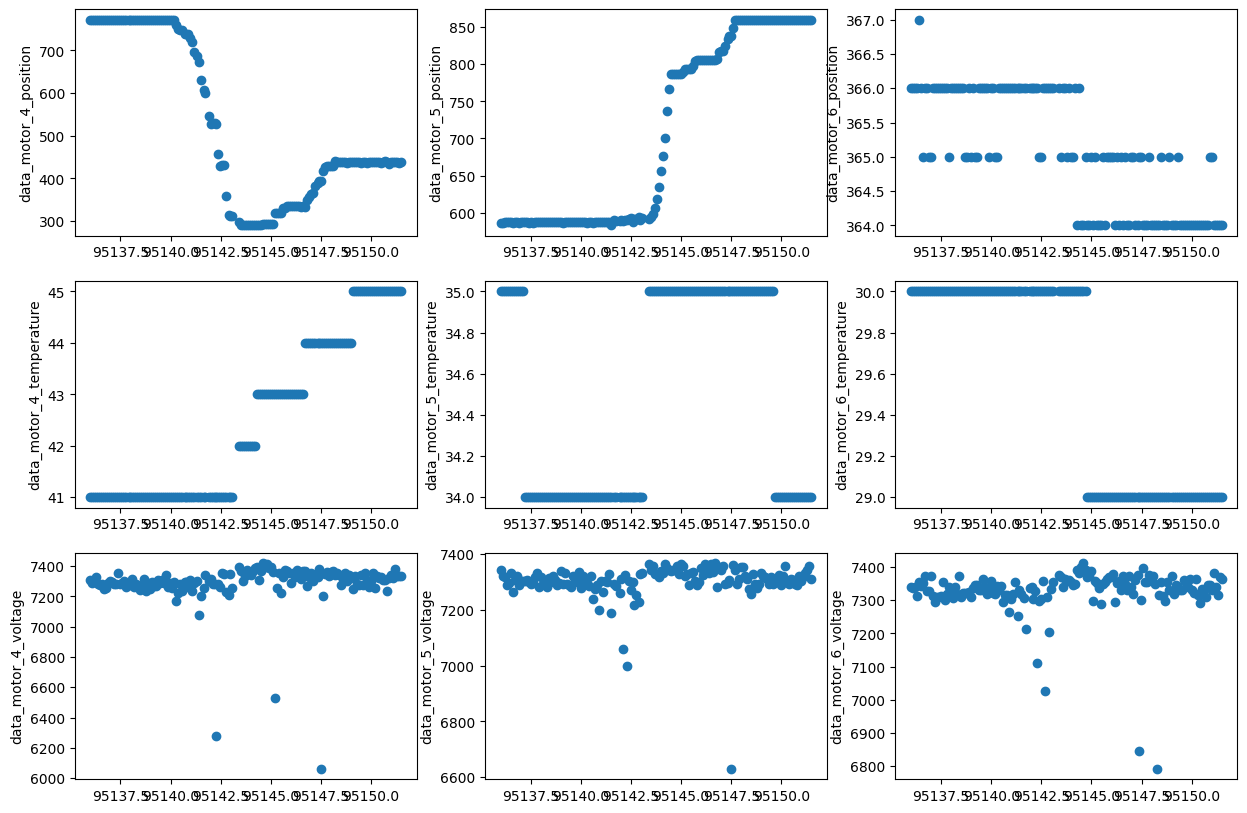

20240426_141938: 17    Moving one motor
Name: Description, dtype: object



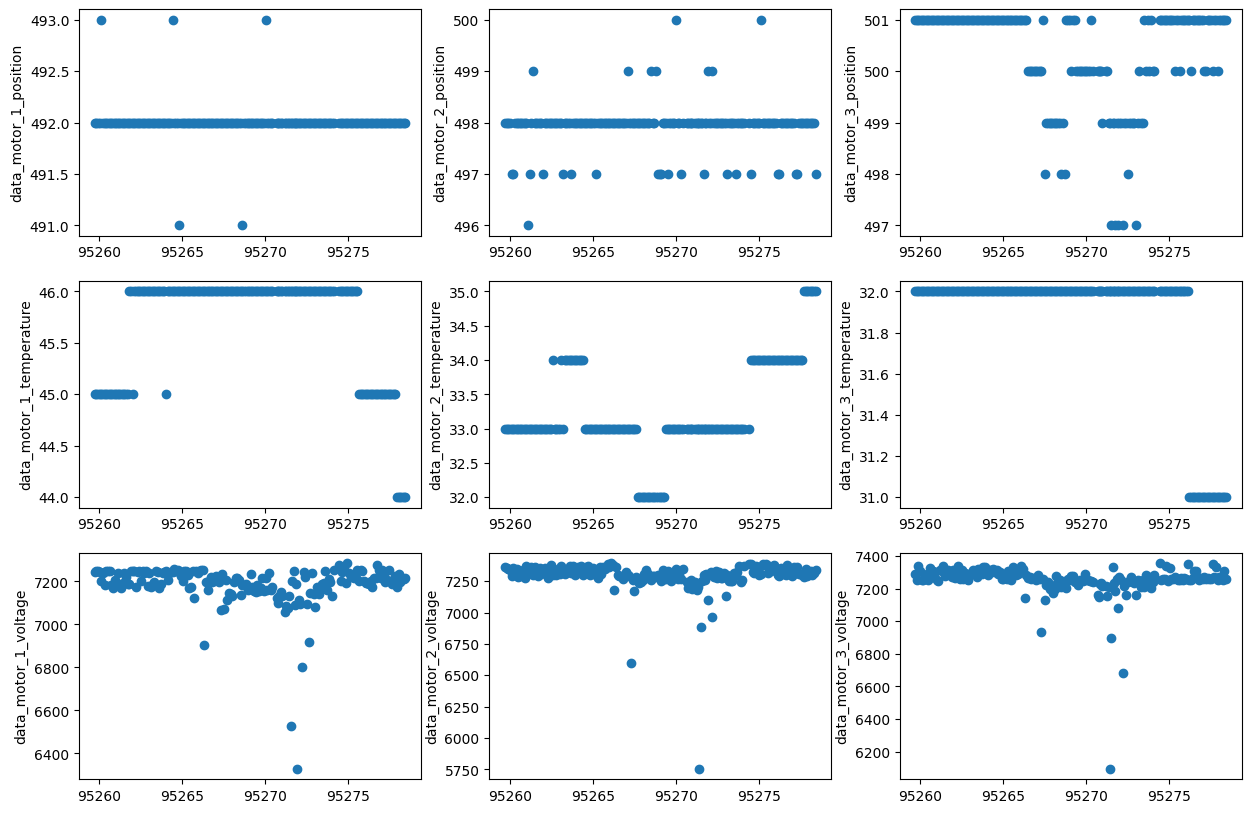

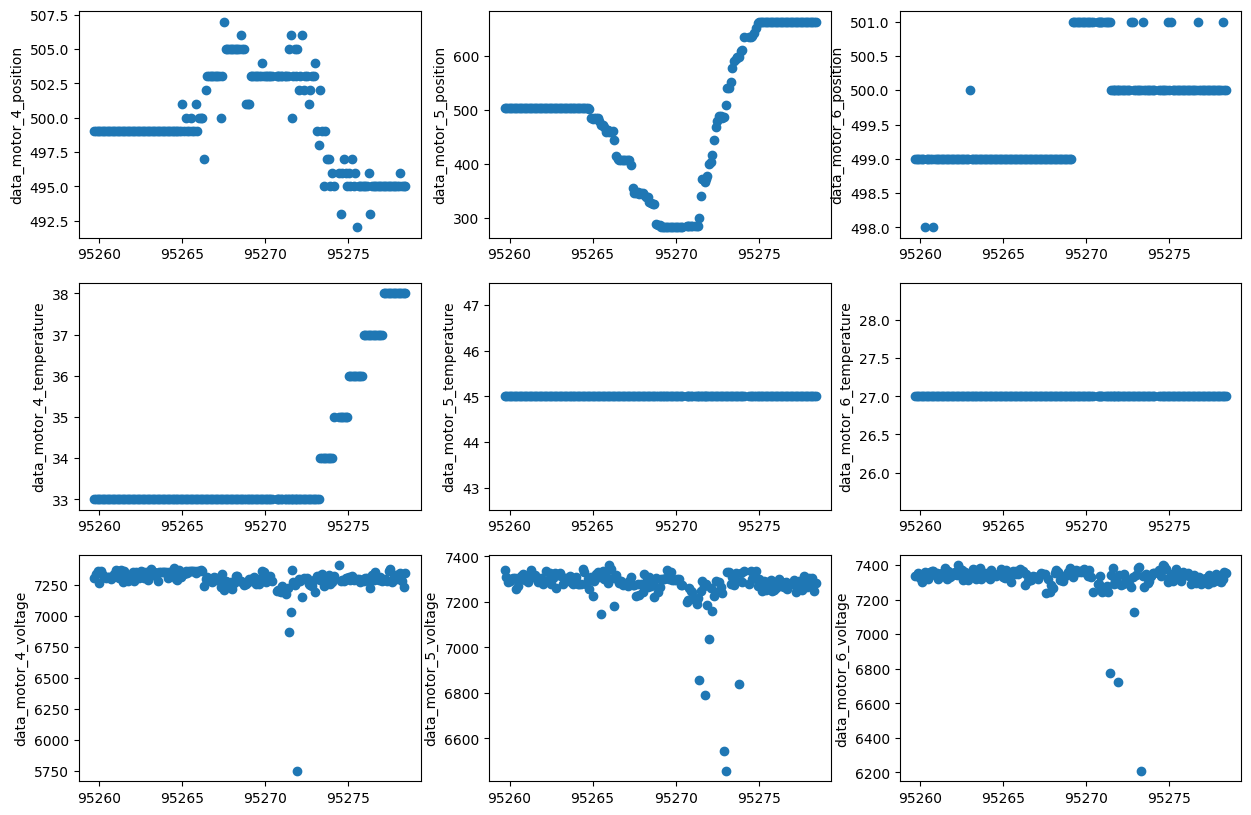

20240426_141980: 18    Moving one motor
Name: Description, dtype: object



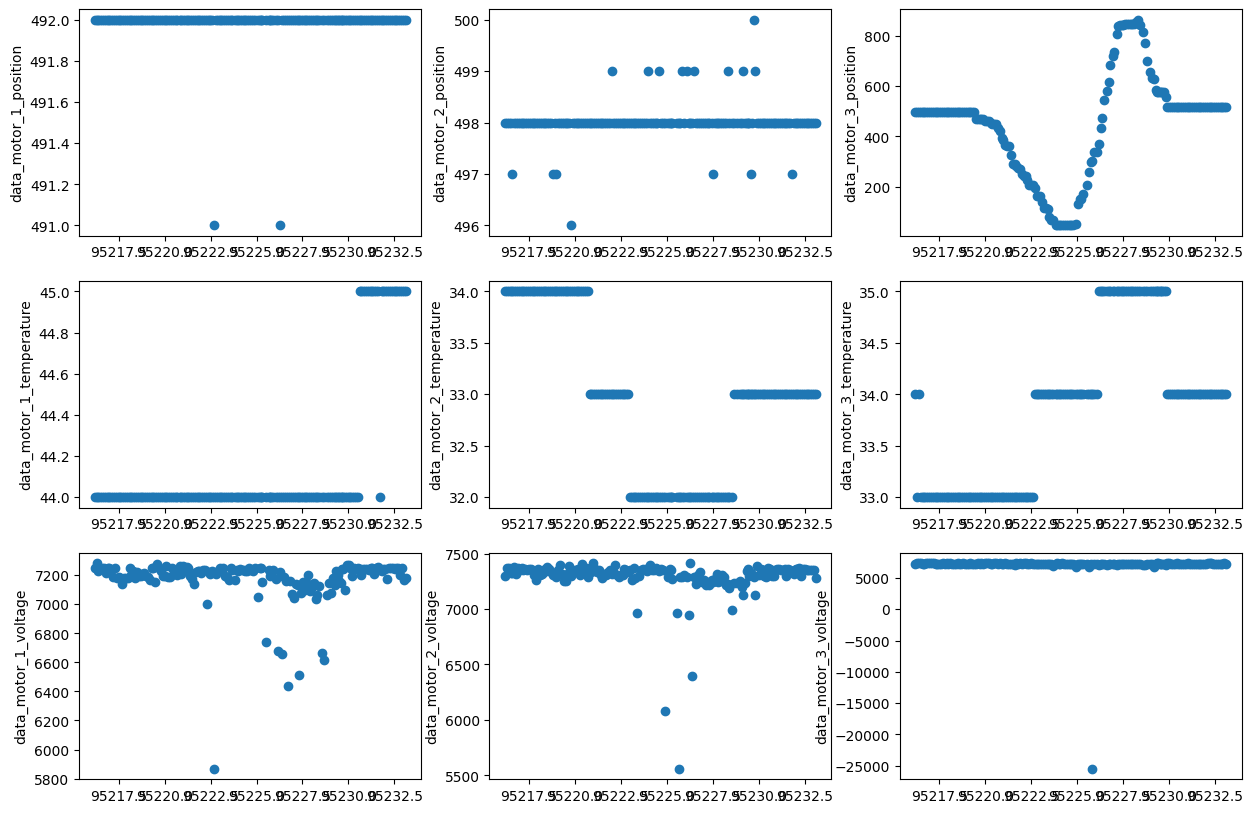

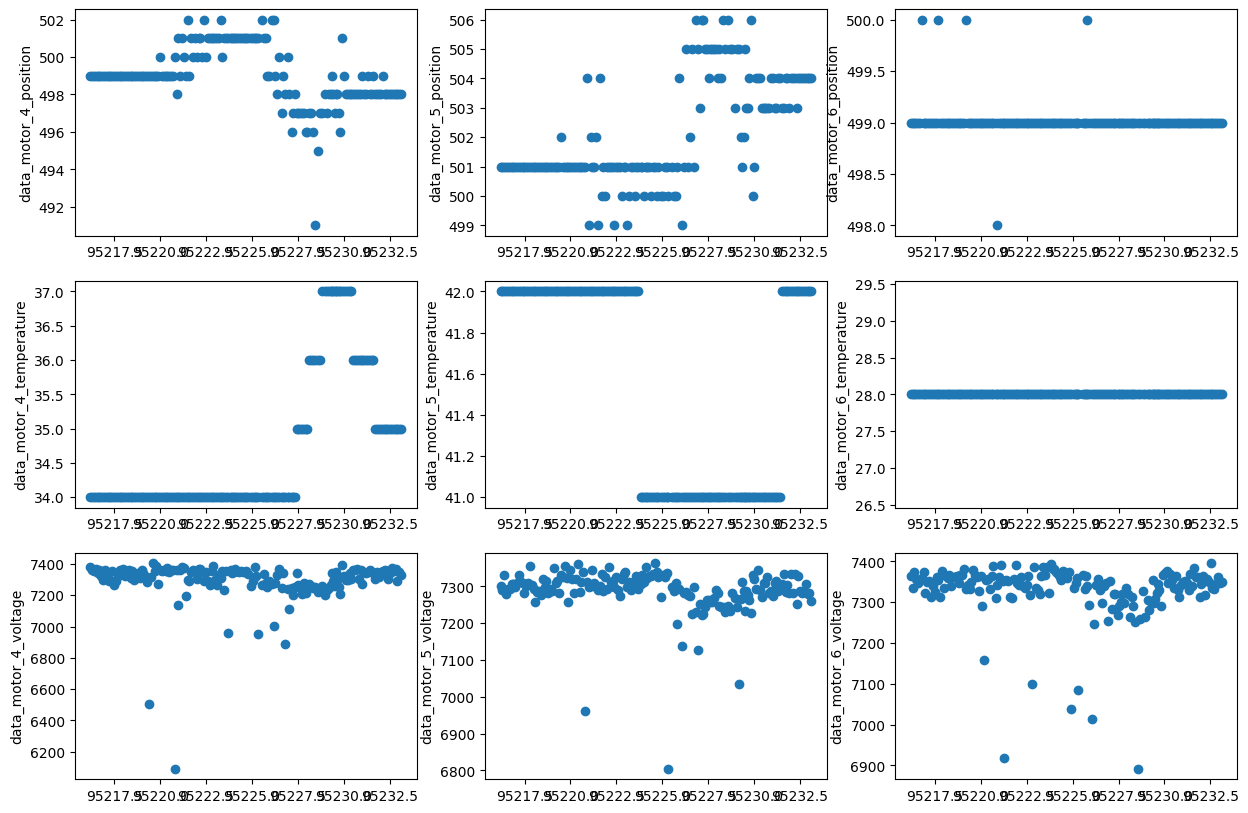

20240503_163963: 19    Pick up and place
Name: Description, dtype: object



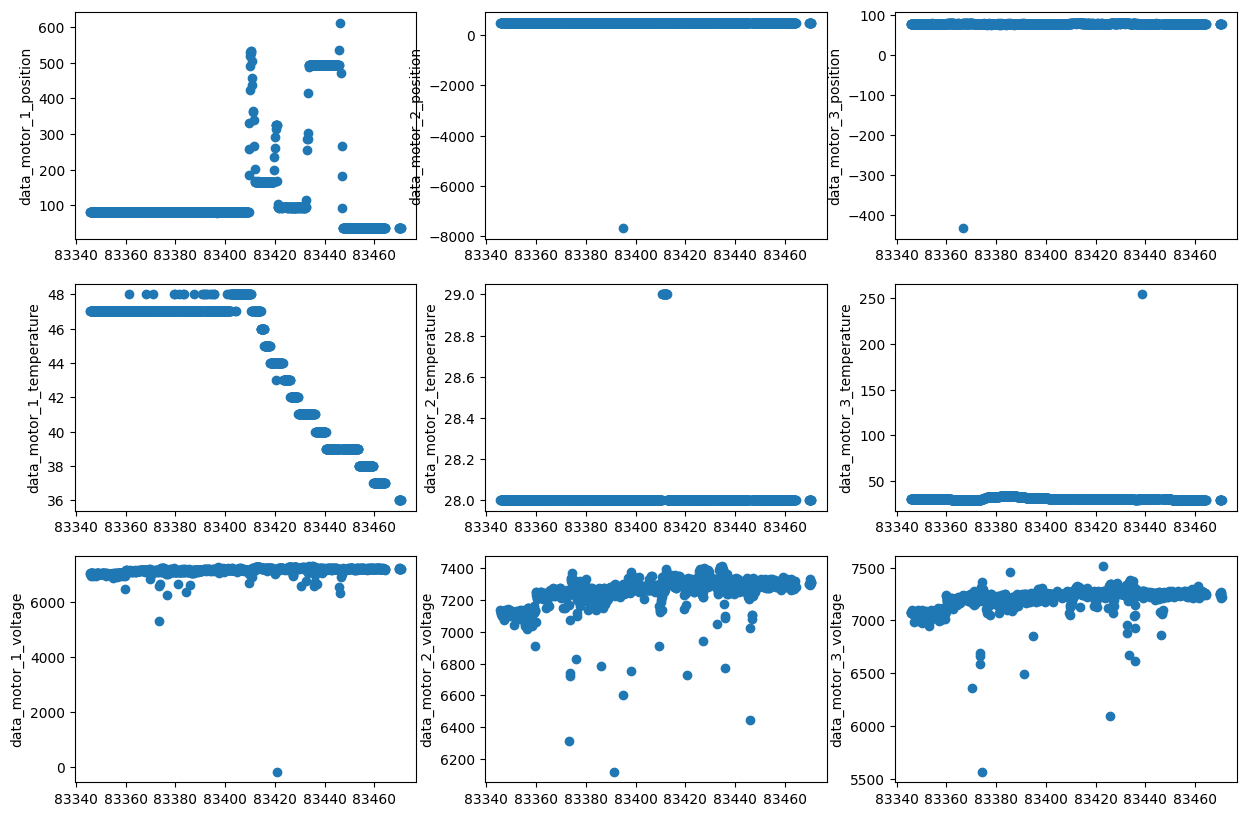

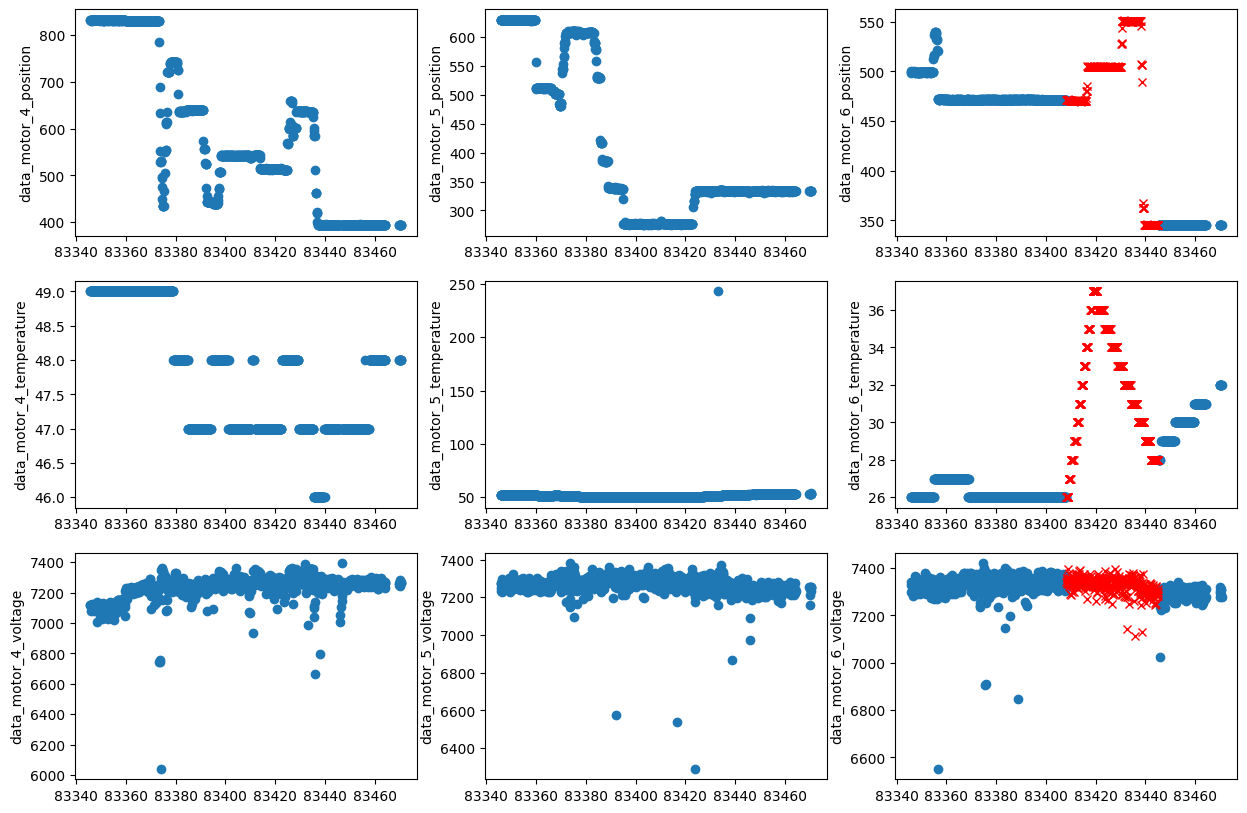

20240503_164435: 20    Turning motor 6
Name: Description, dtype: object



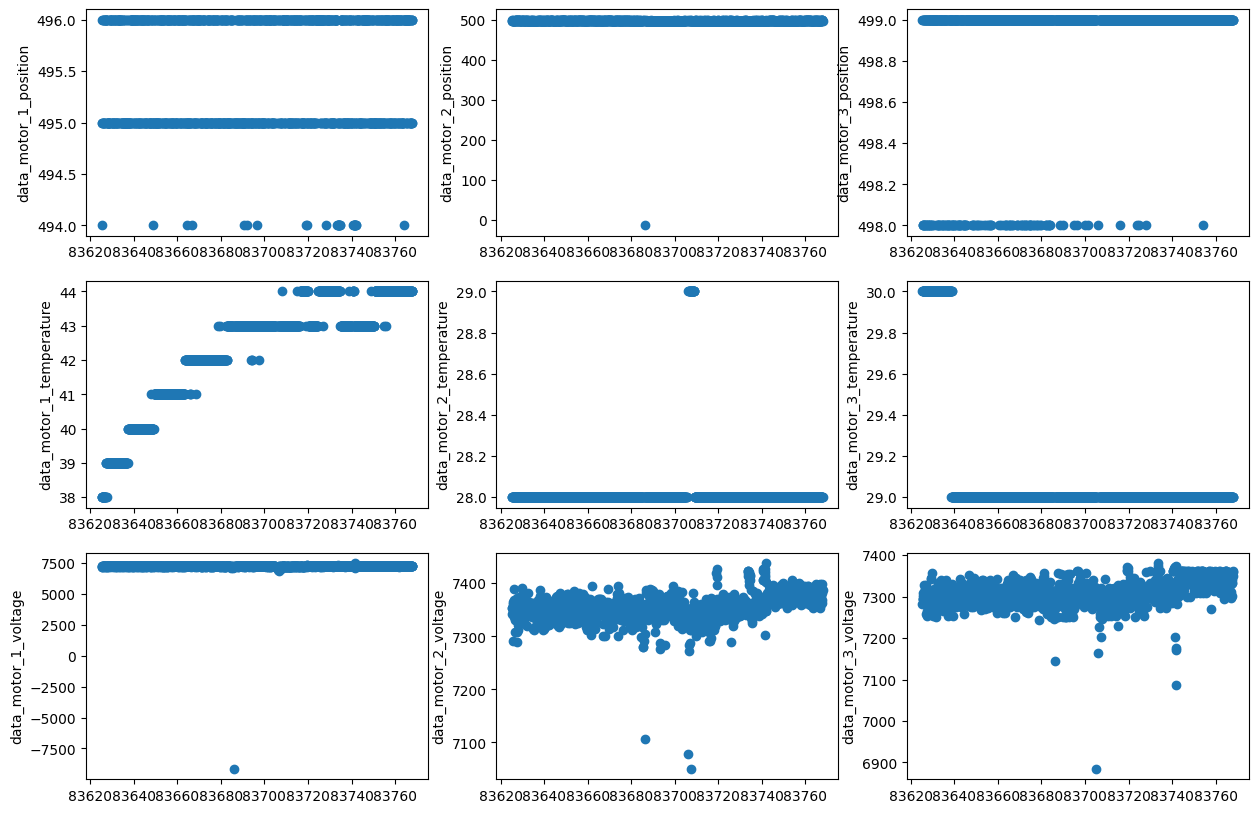

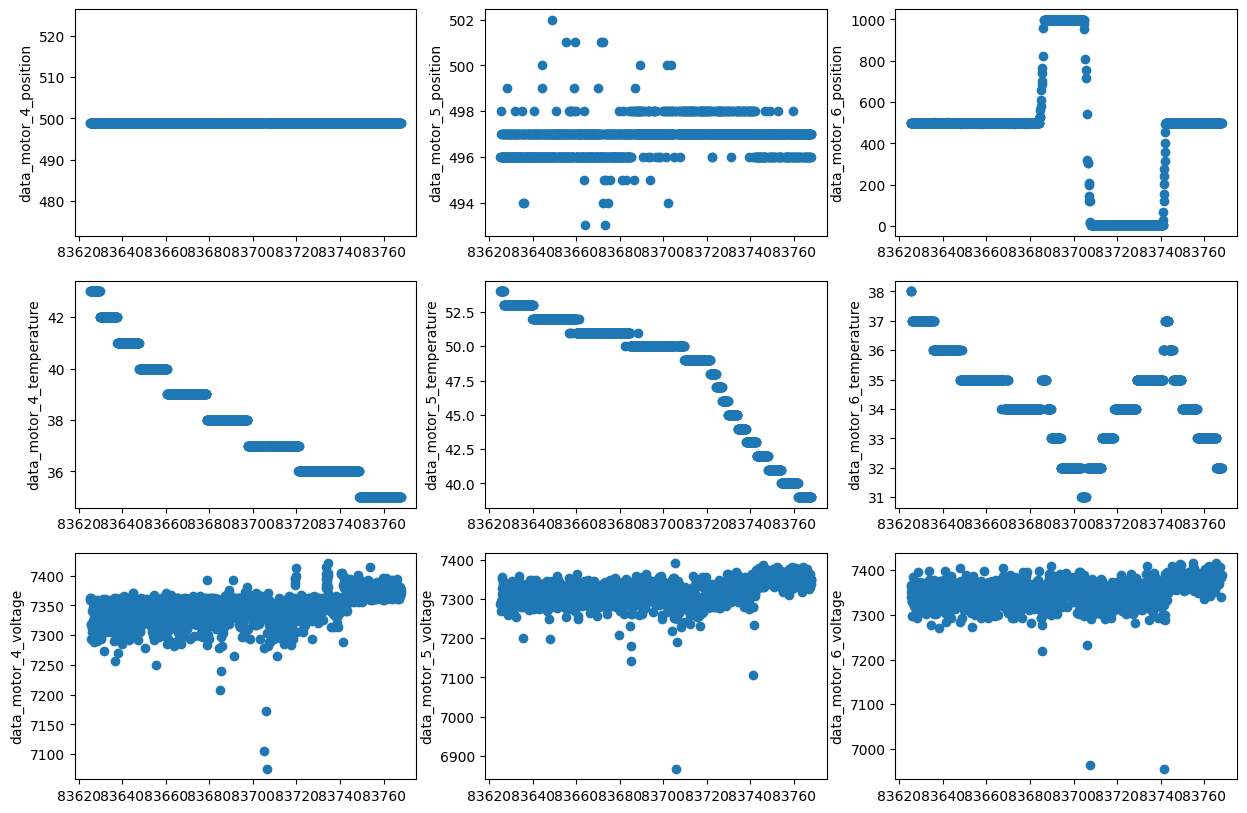

20240503_164675: 21    Turning motor 6
Name: Description, dtype: object



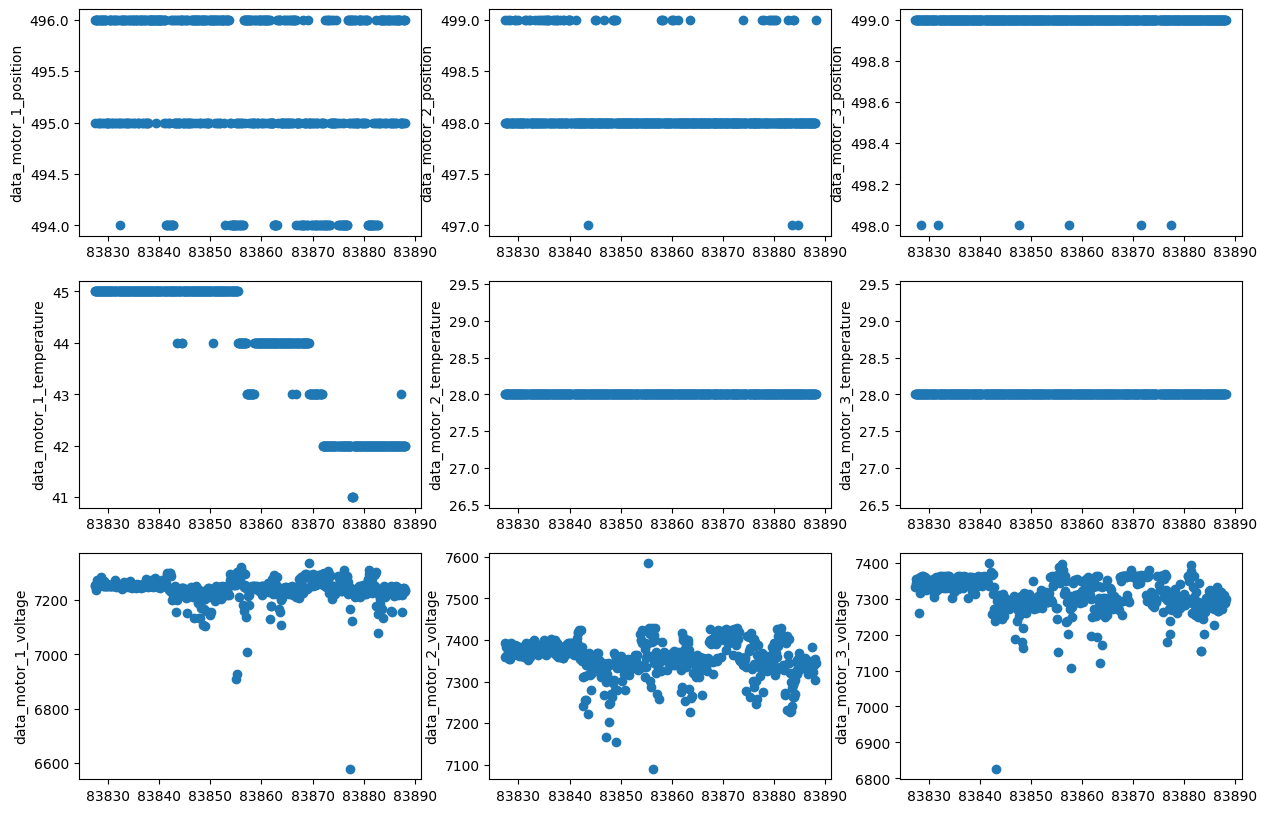

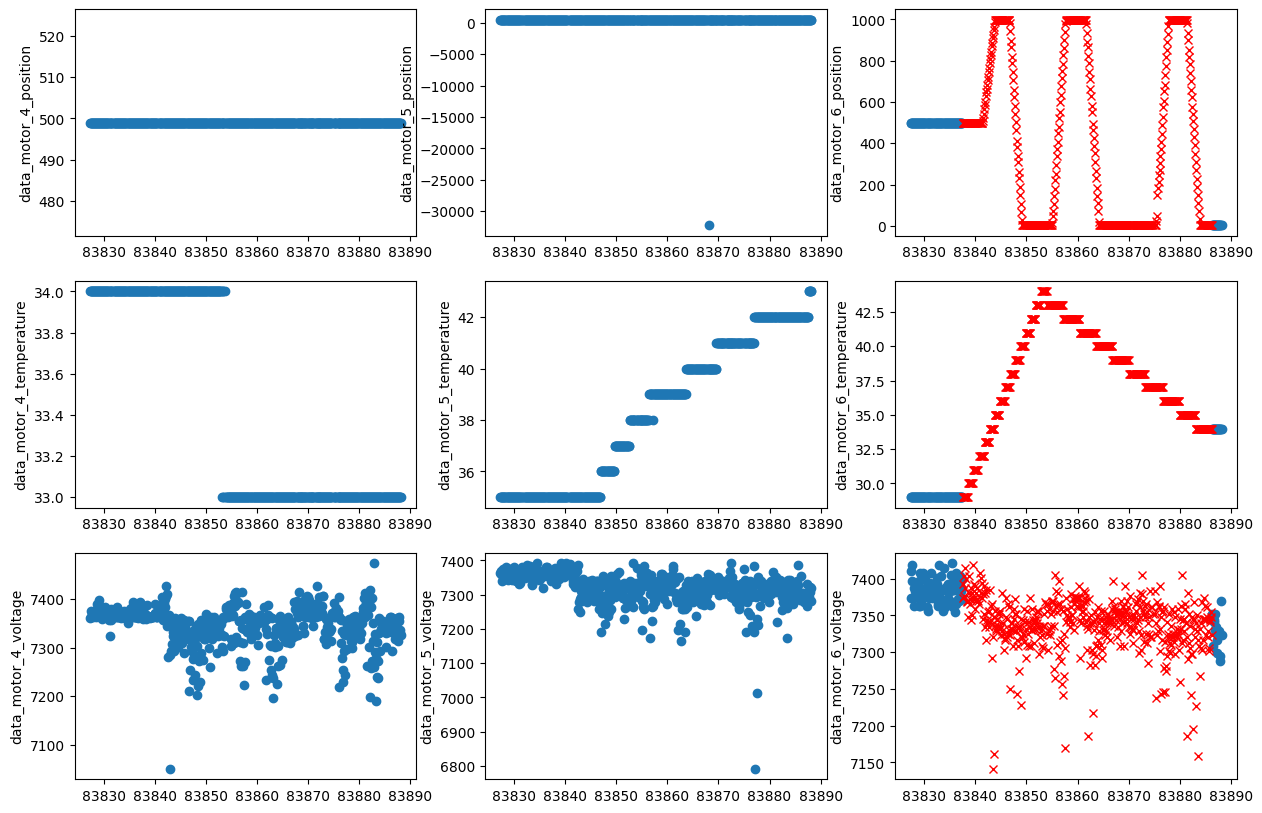

20240503_165189: 22    Turning motor 6
Name: Description, dtype: object



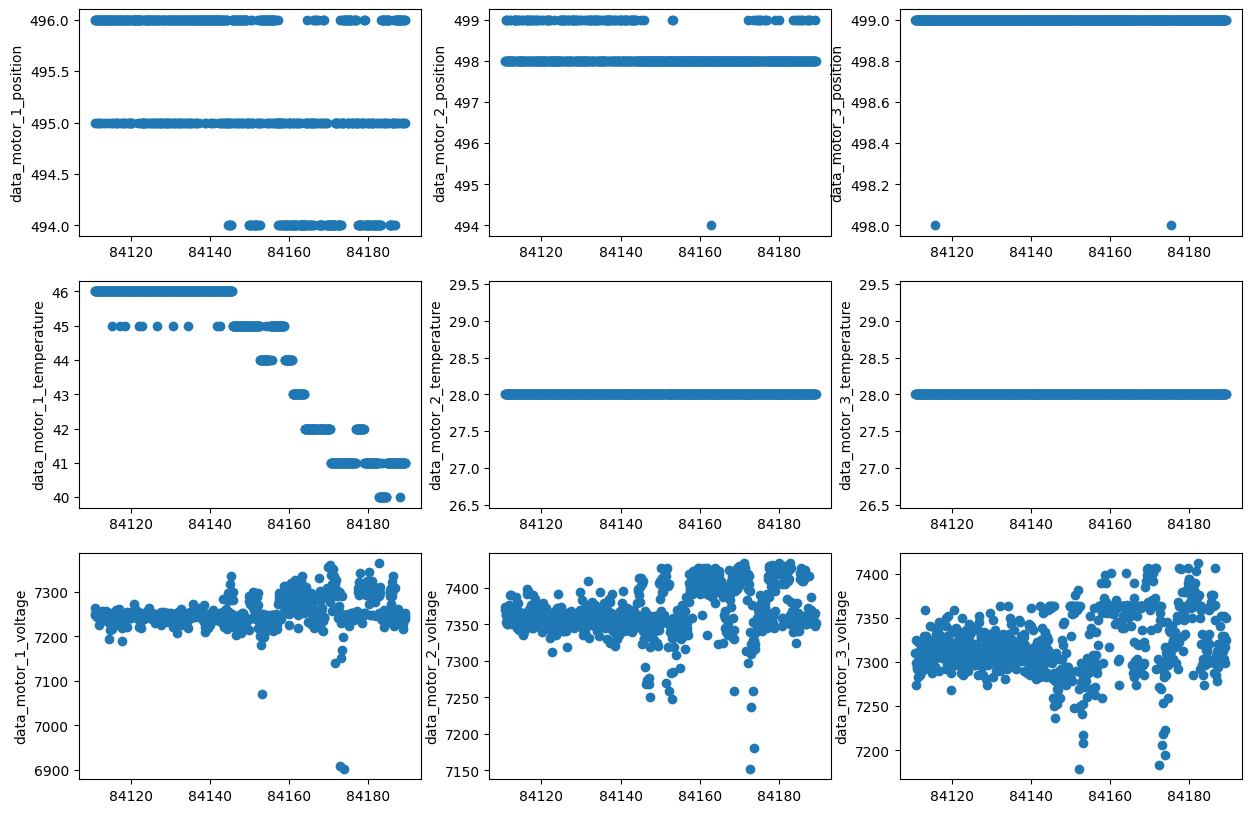

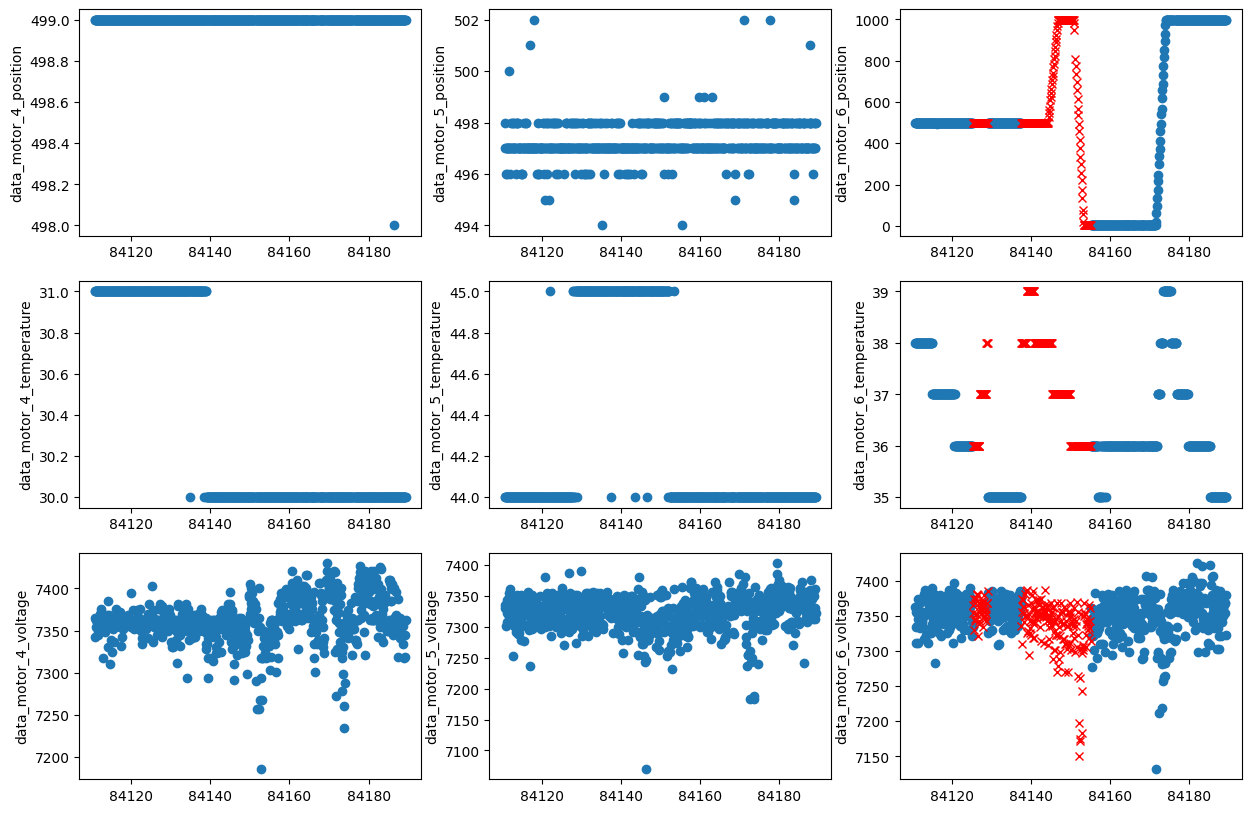

In [ ]:
from utility import read_all_test_data_from_path
training_data_path = '../dataset/training_data/training_data/'
df = read_all_test_data_from_path(training_data_path, is_plot=False)

Please explain the structure (what does each column represent) of the resulted dataframe here.

First there is the time column and then there are four columns for each of the 6 motors: position, temperature, voltage and label. And finally the test_condition !

## Sub-task 2: Data visualization

Visualize the data. By examing the data, you can answer the following questions:
- Do we have a lot noise in the features? Do we need to smooth the data?
- Do we need to scale the features?
- Do we have a lot of outliers? Do we need to remove them?
- Do we have a lot of missing values? Do we need to fill them?
- In general, do you discover some patterns regarding how temperature of the motor changes?
- If we compare the normal data (label = 0) with the failures (label=1), could you see some difference in the pattern of the temperature?

**Submit your summary below:**

1. Yes there is quite a bit of noise, we should smooth the data 
2. Feature scaling is a method used to normalize the range of the different variables to ensure the machine learning properly works. In this case the range of values is very different, around 7000 for voltage, 30 for temperature and 500 for position thus the features should be scaled !
3. Yes we do have outliers and we should remove them to ensure our machine learning model won't perform poorly. 
4. There doesn't seem to be any missing values. 

5. ?
 
6. When the temperature rises there is an error !






## Sub-task 3 Explore the distribution of each feature through histogram and box plot.

In [3]:
df.head(5)

time  data_motor_1_position  data_motor_1_temperature  \
0  76522.025433                     86                        42   
1  76522.125464                     86                        42   
2  76522.225432                     86                        42   
3  76522.325432                     86                        42   
4  76522.425451                     86                        42   

   data_motor_1_voltage  data_motor_1_label  data_motor_2_position  \
0                  7223                   0                    501   
1                  7214                   0                    502   
2                  7137                   0                    501   
3                  7135                   0                    501   
4                  7212                   0                    502   

   data_motor_2_temperature  data_motor_2_voltage  data_motor_2_label  \
0                        31                  7334                   0   
1                        31                  7250                   0   
2                        31                  7234                   0   
3                        31                  7250                   0   
4                        31                  7232                   0   

   data_motor_3_position  ...  data_motor_4_label  data_motor_5_position  \
0                     80  ...                   0                    619   
1                     80  ...                   0                    619   
2                     79  ...                   0                    619   
3                     79  ...                   0                    619   
4                     79  ...                   0                    619   

   data_motor_5_temperature  data_motor_5_voltage  data_motor_5_label  \
0                        43                  7312                   0   
1                        43                  7332                   0   
2                        43                  7330                   0   
3                        43                  7319                   0   
4                        43                  7348                   0   

   data_motor_6_position  data_motor_6_temperature  data_motor_6_voltage  \
0                    500                        24                  7361   
1                    499                        24                  7372   
2                    499                        24                  7356   
3                    499                        24                  7374   
4                    499                        24                  7365   

   data_motor_6_label   test_condition  
0                   0  20240105_164214  
1                   0  20240105_164214  
2                   0  20240105_164214  
3                   0  20240105_164214  
4                   0  20240105_164214  

[5 rows x 26 columns]

['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage', 'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage', 'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage', 'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage', 'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage', 'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']


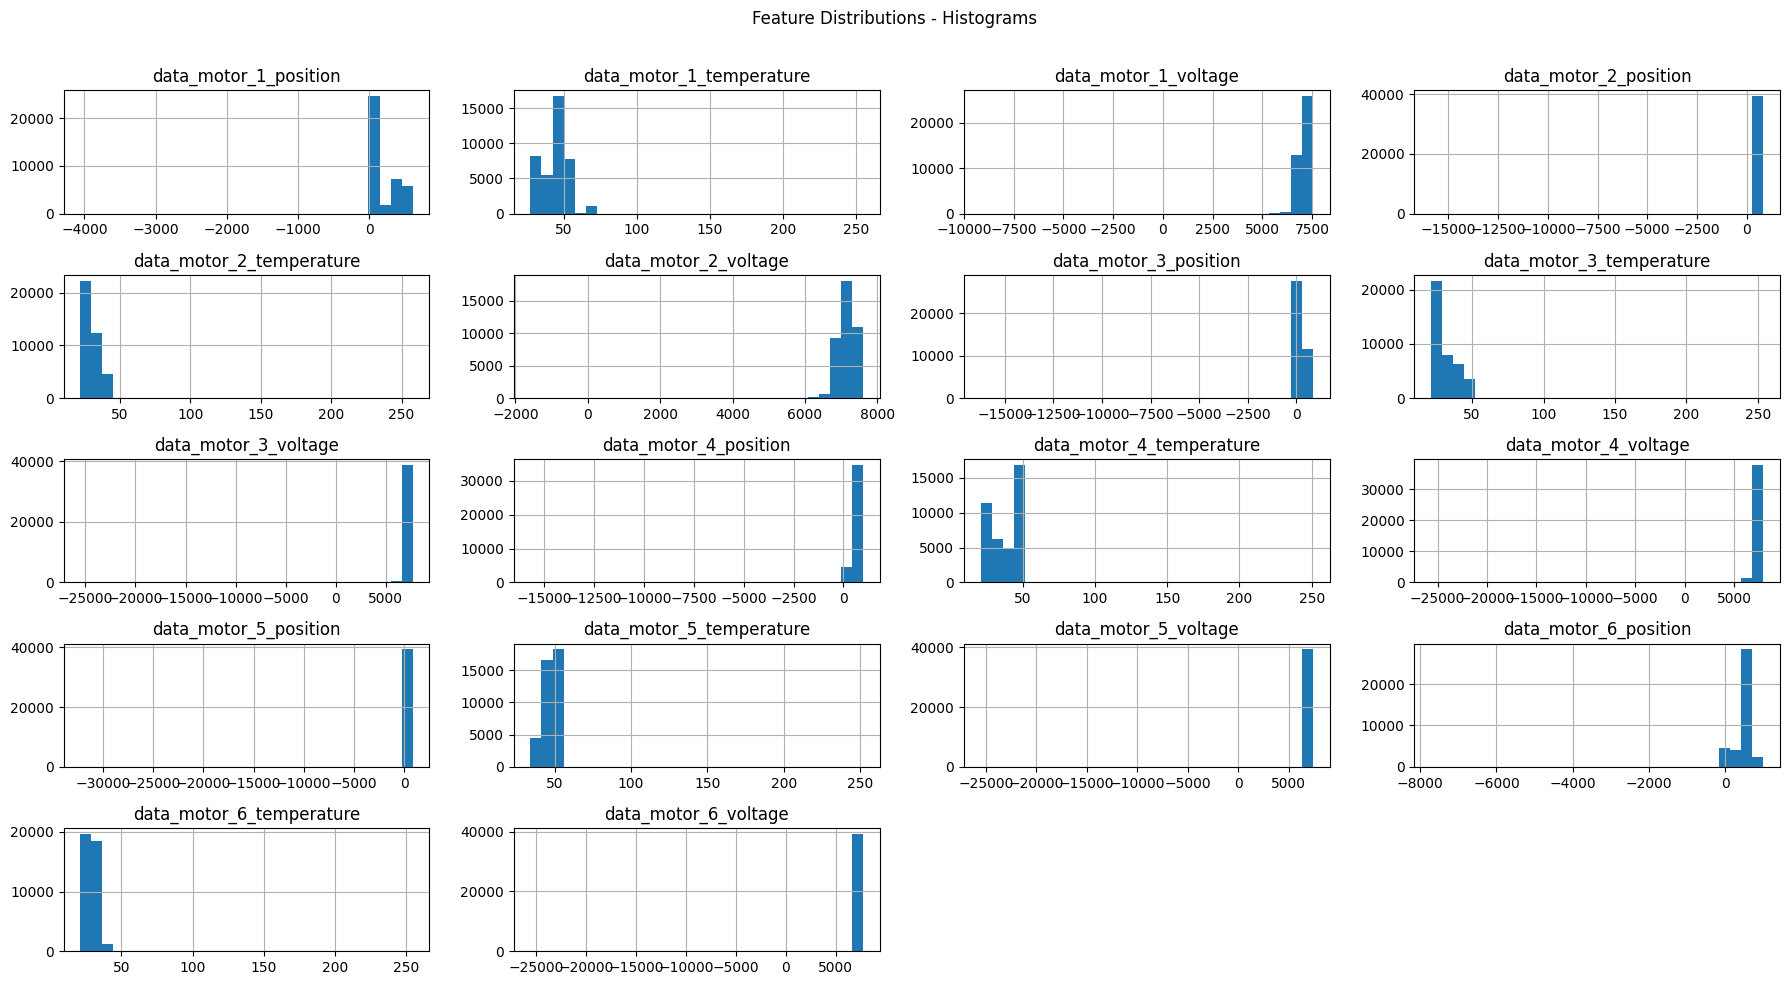

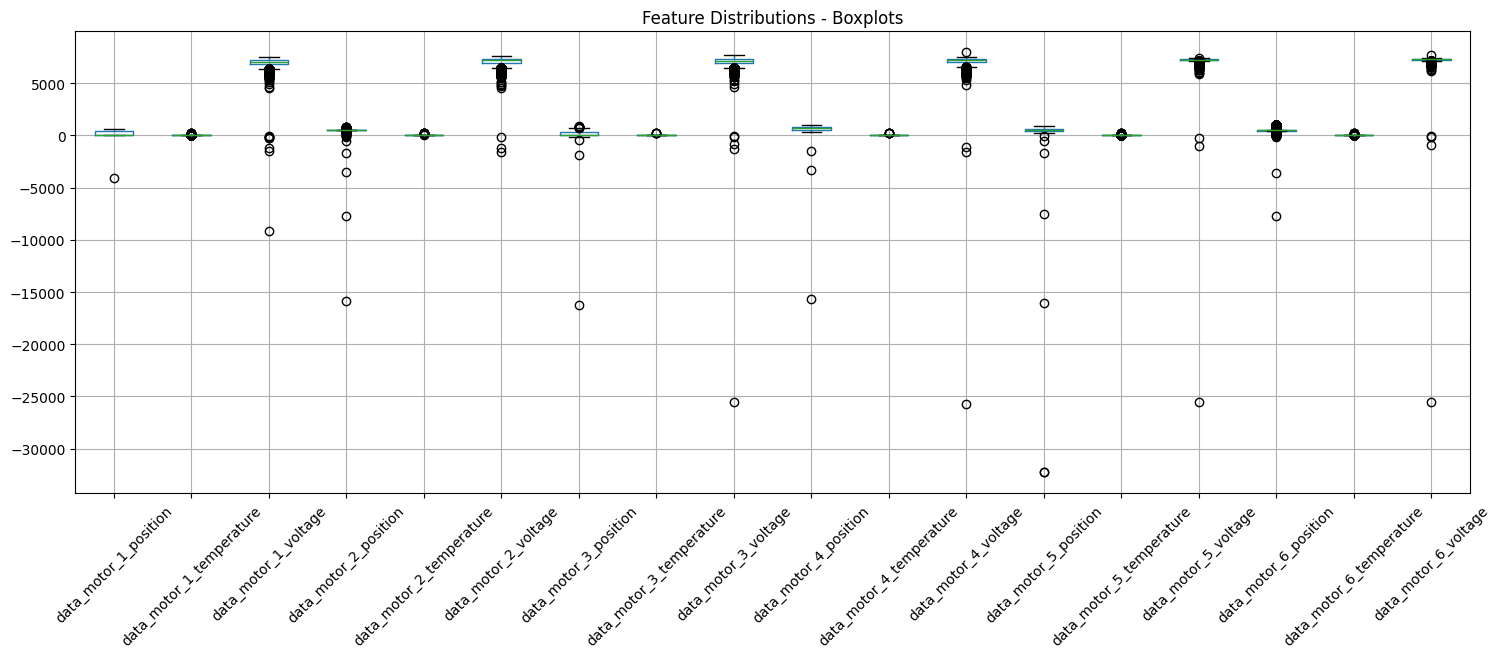

In [27]:

import matplotlib.pyplot as plt


feature_cols = [c for c in df.columns if c not in ['time', 'test_condition'] and not c.endswith('label')]

print(feature_cols)
# Plot histograms for each feature
df[feature_cols].hist(bins=30, figsize=(18, 10))
plt.suptitle('Feature Distributions - Histograms')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Plot boxplots for each feature
plt.figure(figsize=(18, 6))
df[feature_cols].boxplot()
plt.title('Feature Distributions - Boxplots')
plt.xticks(rotation=45)
plt.show()
   




## Sub-task 4 Use PCA to visulize the data in a 2-d plane.

Normally, before any further analysis, we try to plot all the features directly in a 2-d plane. This is because the 2-d plane is a very simple representation of the data and allows us to visually inspect the patterns of the data. A normal conclusion we can make is whether the data are linear seperable or not, i.e., if you can simply fit a straight line to seperate postitive and negative classes. However, if the data is high-dimensional, it is difficult to visualize it in a 2-d plane. In this case, we can use PCA to reduce the dimensionality of the data and then plot it in a 2-d plane.

Below is a code for performing PCA and plotting the data in a 2-d plane. What can you see from the results?

['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage', 'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage', 'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage', 'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage', 'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage', 'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']


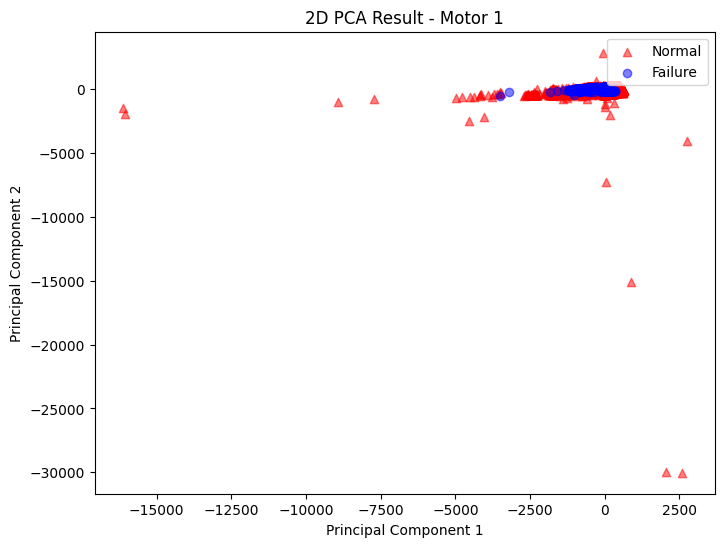

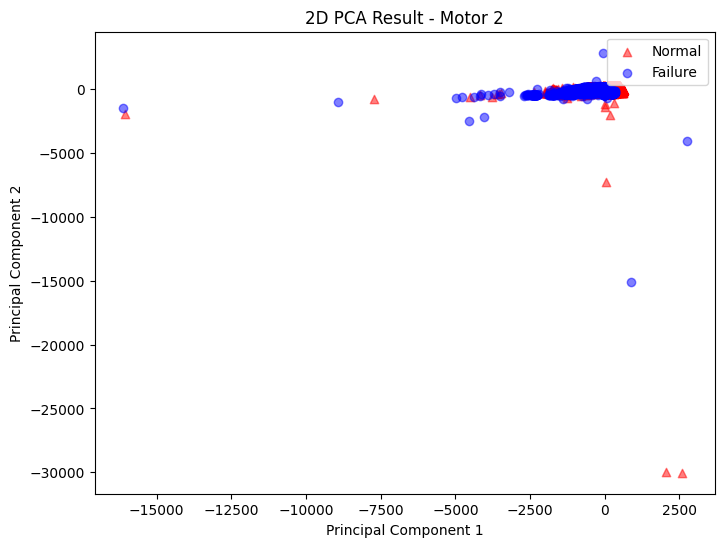

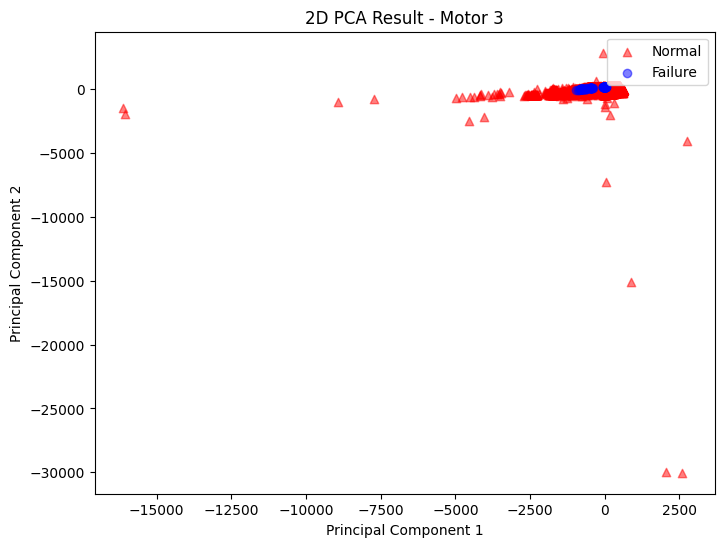

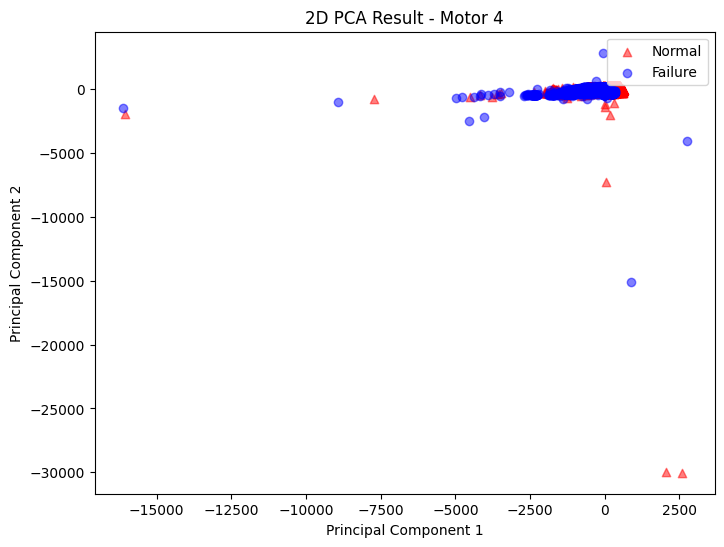

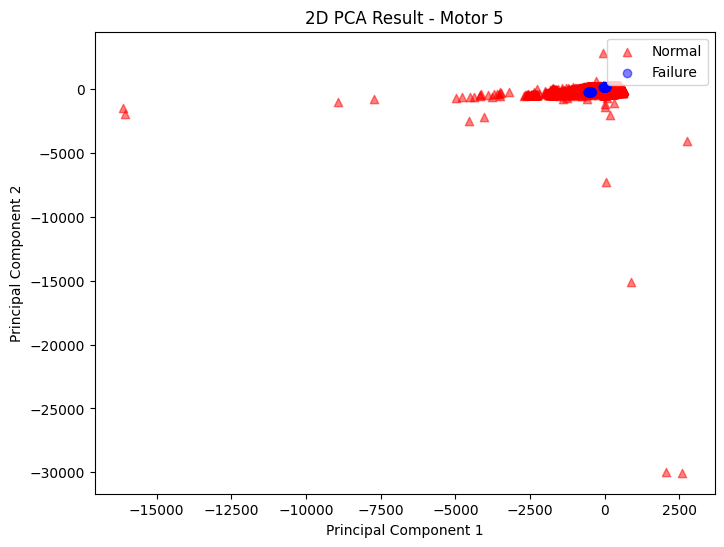

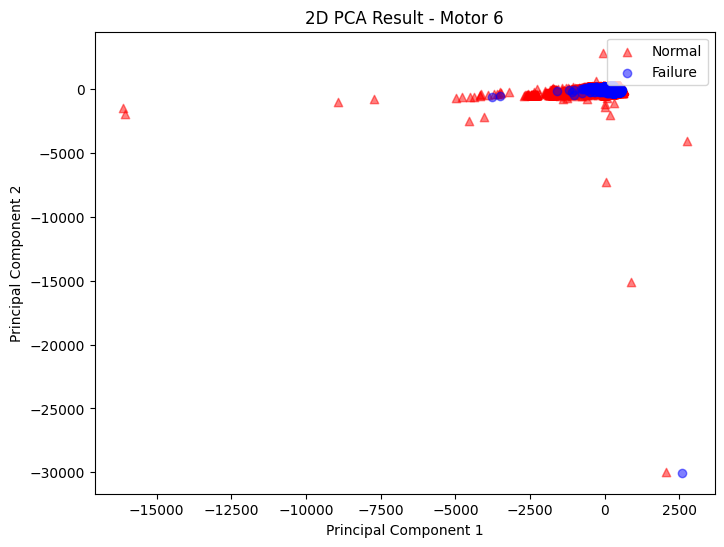

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print (feature_cols)
label_cols = [f"data_motor_{i}_label" for i in range(1, 7)]


for i, label_col in enumerate(label_cols, 1):
    X = df[feature_cols]
    y = df[label_col]
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Normal')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Failure')
    plt.title(f'2D PCA Result - Motor {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

In the above analysis, we did not perform data normalization/standardization. Could you try to do that and see if the results change? You can use the follwing code for standardization:

```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
```

And this for normalization:

```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
```


['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage', 'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage', 'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage', 'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage', 'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage', 'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']


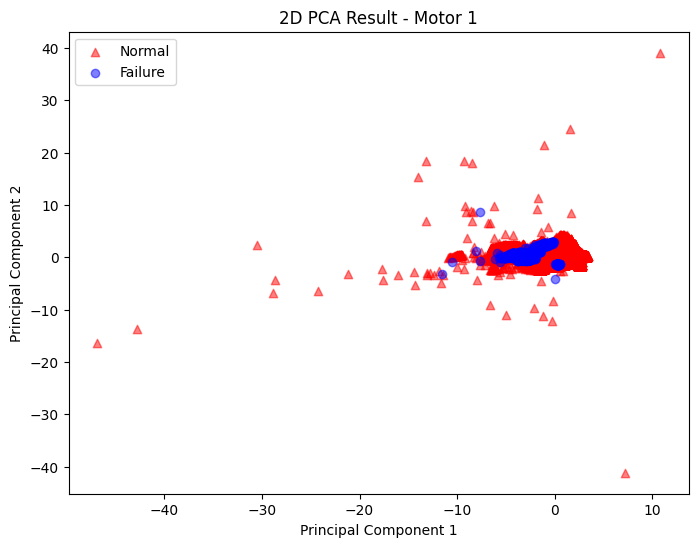

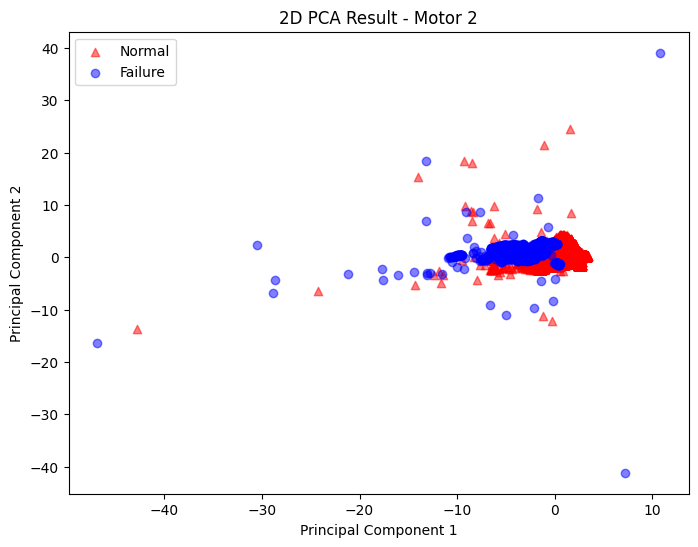

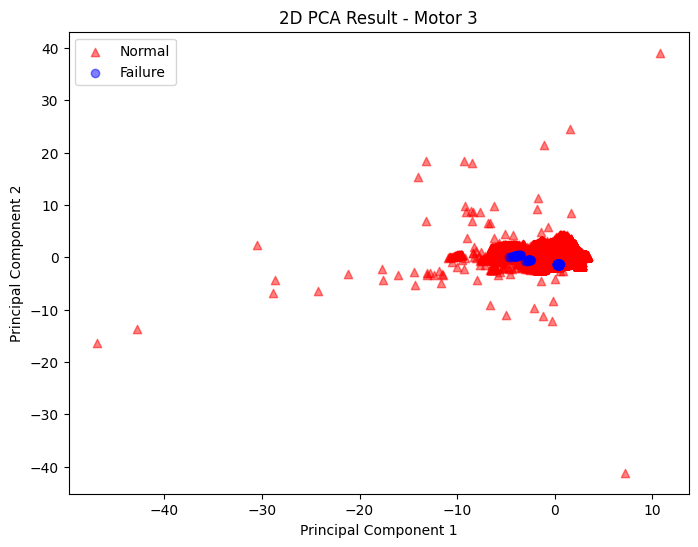

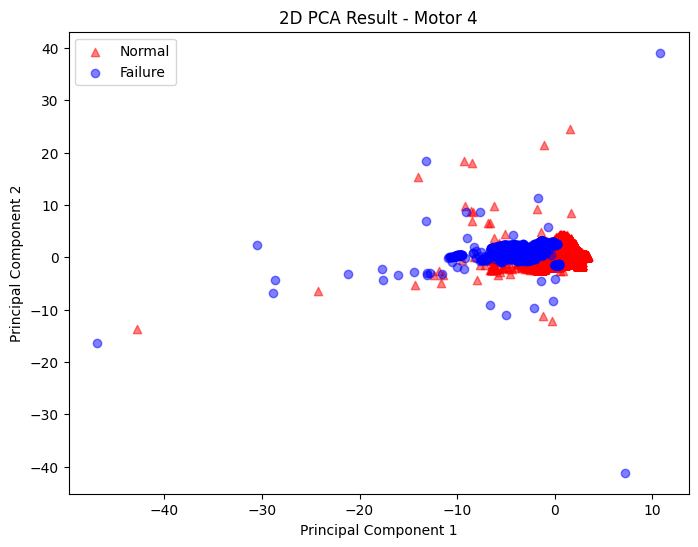

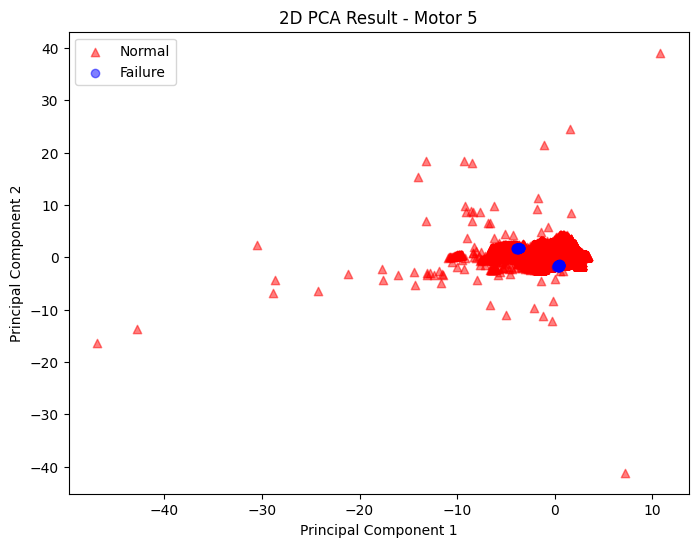

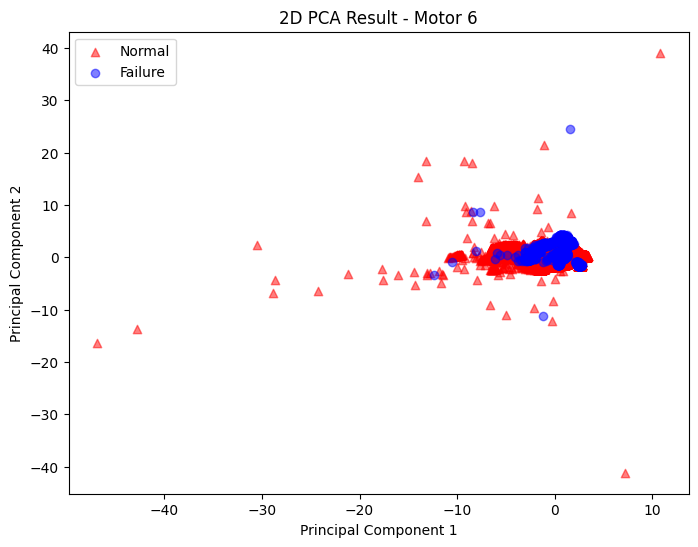

In [28]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

print (feature_cols)
label_cols = [f"data_motor_{i}_label" for i in range(1, 7)]


for i, label_col in enumerate(label_cols, 1):
    X = df[feature_cols]
    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(X)
    y = df[label_col]
    
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], color='red', marker='^', alpha=.5, label='Normal')
    plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], color='blue', marker='o', alpha=.5, label='Failure')
    plt.title(f'2D PCA Result - Motor {i}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.show()

# Task 2 Data cleaning and preprocessing

## Task 1: Normalize the dataset.

Define your strategy to normalize the dataset and implement the data. Please pay attention to the difference between fit_transform(), fit(), and transform().

Anwser:

fit(): Learns the parameters (mean, std, min, max) from the data, but does not apply transformation.
transform(): Applies the learned transformation to the data.
fit_transform(): Combines both steps (fit + transform) on the same data

Using fit and transform separately when we need them both decreases the efficiency of the model. Instead, fit_transform() is used to get both works done.

Thus when training the model, we should use fit_transform() to get the mean and std values and apply the transformation on the training data at once.
When testing the model, we should use transform() to apply the same transformation on the test data using the mean and std values learned from the training data. This ensures that the test data is transformed in the same way as the training data.


!!! for the scaler: if there are a lot of outliers don't use minmax use standard !!! 

MinMax takes the min and max values if ouliers the 0 and 1 won't be good thus use standard !


In [29]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

print (feature_cols)
X= df[feature_cols]
scaler = StandardScaler()
X = scaler.fit_transform(X)


['data_motor_1_position', 'data_motor_1_temperature', 'data_motor_1_voltage', 'data_motor_2_position', 'data_motor_2_temperature', 'data_motor_2_voltage', 'data_motor_3_position', 'data_motor_3_temperature', 'data_motor_3_voltage', 'data_motor_4_position', 'data_motor_4_temperature', 'data_motor_4_voltage', 'data_motor_5_position', 'data_motor_5_temperature', 'data_motor_5_voltage', 'data_motor_6_position', 'data_motor_6_temperature', 'data_motor_6_voltage']


## Task 2: Define a strategy to remove outliers.

Explain how you remove the outliers and implement your approach here.

In [ ]:
outlier for position 0 and 1000 ok if not in this range remove !!! (thats what the teacher said) for the others we need to think



## Task 3: Define a strategy to smooth the data.

Explain how do you smooth the data and implement your approach here.

# Task 3 Feature engineering

## Task 1: Use violin plot to explore the significance of each feature.

## Task 2: Use correlation coefficient matrix to explore the correlation among the features.

## Conclusion of feature engineering

**Write your conclusion of feature engineering here.** For example, which features are most relevant? Which features are not relevant? Which features are redundant? Which features are irrelevant? Eventually, what are your decisions regarding which features to be used?


